[Load MATLAB Data](#another_cell)


In [ ]:
!pip install mat73


In [ ]:
import mat73
vpae_dict = mat73.loadmat('VPae.mat')

In [ ]:
vpae_dict['cnt']['clab'][0]

'EOGv'

In [ ]:
import numpy as np

In [ ]:
n = len(vpae_dict['cnt']['x'])
print(n)

1619936


In [ ]:
EOGv_data = np.array([vpae_dict['cnt']['x'][i][0] for i in range(n)])

In [ ]:
EOGv_data[0:5]

array([ -4.01689151, -11.26689082, -20.7702683 , -28.6081054 ,
       -33.40878062])

In [ ]:
len(EOGv_data)

1619936

In [ ]:
from matplotlib import pyplot as plt

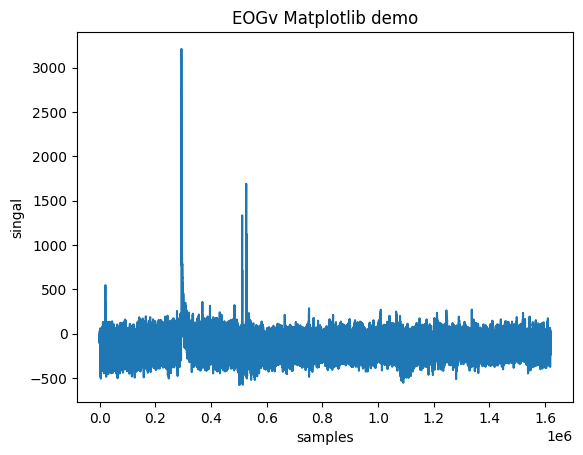

In [ ]:
x = np.arange(0,n)
plt.title("EOGv Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,EOGv_data)
plt.show()

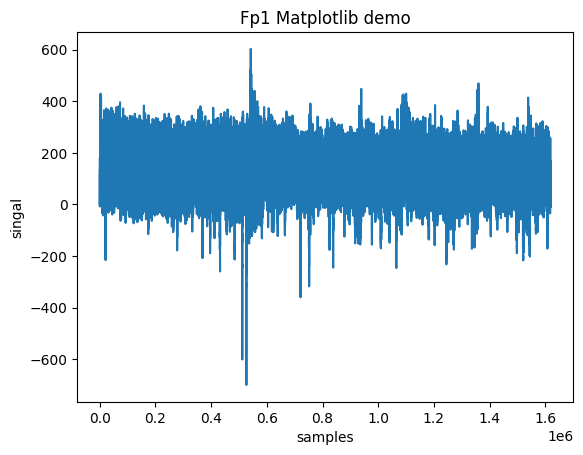

In [ ]:
Fp1_data = np.array([vpae_dict['cnt']['x'][i][1] for i in range(n)])

plt.title("Fp1 Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,Fp1_data)
plt.show()

In [ ]:
Fp1_data[0:5]

array([ 2.30583748,  7.04561453, 14.36878358, 21.54250019, 25.36421232])

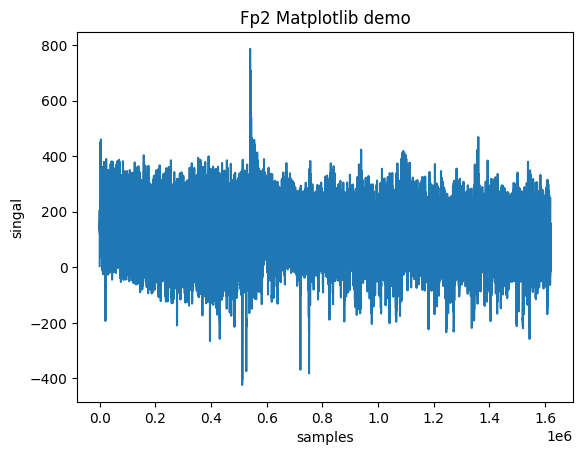

In [ ]:
Fp2_data = np.array([vpae_dict['cnt']['x'][i][2] for i in range(n)])

plt.title("Fp2 Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,Fp2_data)
plt.show()

NameError: name 'x1' is not defined

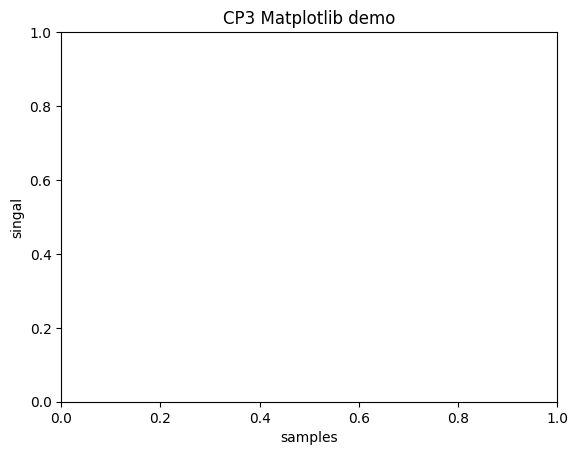

In [ ]:
CP3_data = np.array([vpae_dict['cnt']['x'][i][35] for i in range(n)])

plt.title("CP3 Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x1,CP3_data)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.6 kB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.6 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
print(CP3_data[0:5])

[ 2.04845902  6.04897899 12.04975894 17.93004131 21.4244714 ]


NameError: name 'seaborn' is not defined

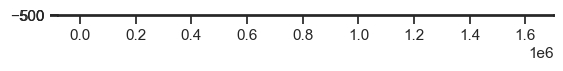

In [ ]:
import seaborn as sb
sb.set(style='ticks')

x1 = np.linspace(0,n,num=n)
fig, ax = plt.subplots()
ax.plot(x1, CP3_data)
ax.set_aspect('equal')
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) # the important part here


In [ ]:
!pip install mne

In [ ]:
window = 500
average_y = []
for ind in range(len(CP3_data) - window + 1):
    average_y.append(np.mean(CP3_data[ind:ind+window]))

KeyboardInterrupt: 

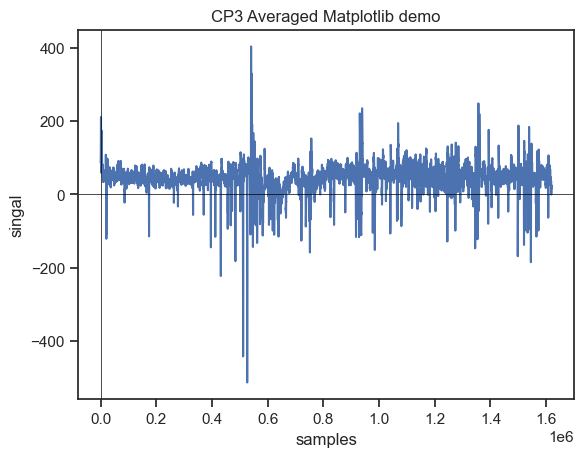

In [ ]:
x = np.arange(0,len(average_y))

plt.title("CP3 Averaged Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,average_y)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
CP3_data[0:10]

array([ 2.04845902,  6.04897899, 12.04975894, 17.93004131, 21.4244714 ,
       21.90646176, 20.0748984 , 16.7009659 , 11.64006714,  5.06089876])

In [ ]:
window = 10000
average = []
for ind in range(int(len(CP3_data) / window)):

    average.append(np.mean(CP3_data[ind*window:ind*window+window]))

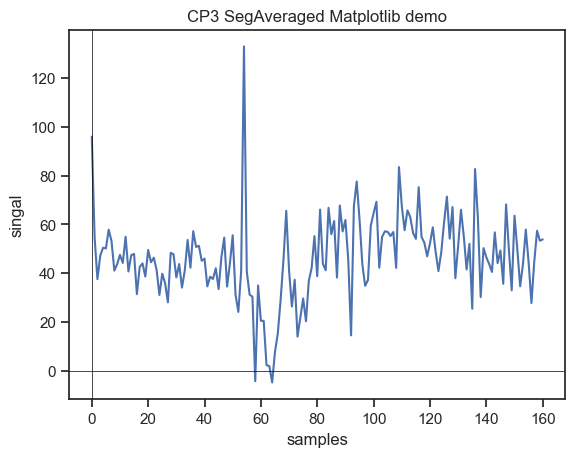

In [ ]:
x = np.arange(0, len(average))

plt.title("CP3 SegAveraged Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,average)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

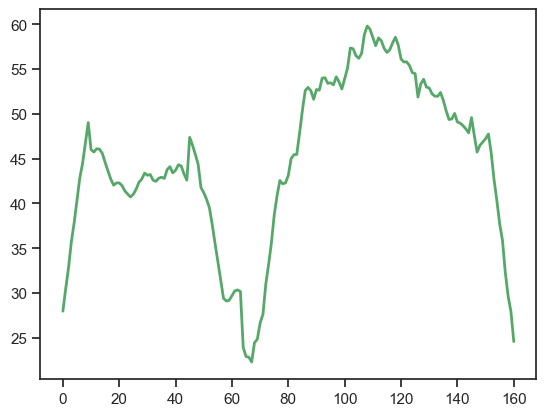

In [ ]:
x = np.arange(0,len(average))
y = average

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#plt.plot(x, y,'o')
#plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,19), 'g-', lw=2)

In [ ]:
vpae_dict['mrk']['y']

# Get the indices where the elements are one
indices_car_normal = np.where(vpae_dict['mrk']['y'][0] == 1)
indices_car_brake = np.where(vpae_dict['mrk']['y'][1] == 1)
indices_car_hold = np.where(vpae_dict['mrk']['y'][2] == 1)
indices_car_collision = np.where(vpae_dict['mrk']['y'][3] == 1)
indices_react_emg = np.where(vpae_dict['mrk']['y'][4] == 1)

In [ ]:
indices_car_normal = [indices_car_normal[0][i] for i in range(len(indices_car_normal[0]))]
print(indices_car_normal[0:5])

[3, 7, 11, 15, 19]


In [ ]:
values_car_normal = dict()
for idx in indices_car_normal:
    values_car_normal[idx] = CP3_data[idx]

values_car_normal = np.array([CP3_data[i] for i in indices_car_normal])
values_car_brake = np.array([CP3_data[i] for i in indices_car_brake[0]])

In [ ]:
print(values_car_normal[0:5])

[17.93004131 16.7009659  -5.85618285 -1.85566288 -9.37471246]


In [ ]:
print(list(values_car_normal.items()))

AttributeError: 'numpy.ndarray' object has no attribute 'items'

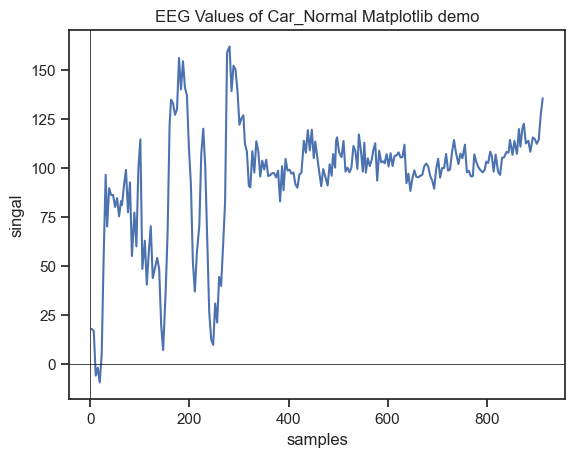

In [ ]:
x = np.arange(0, len(values_car_normal))

plt.title("EEG Values of Car_Normal Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(indices_car_normal,values_car_normal)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
vpae_dict['mrk']['time']
times_car_normal = [int(vpae_dict['mrk']['time'][i]/5) for i in indices_car_normal]
print(np.max(times_car_normal))
len(CP3_data)
# values_car_normal = np.array([CP3_data[i] for i in times_car_normal])

1615755


1619936

In [ ]:
print(times_car_normal[0:5])

[6130, 12129, 18329, 25124, 31524]


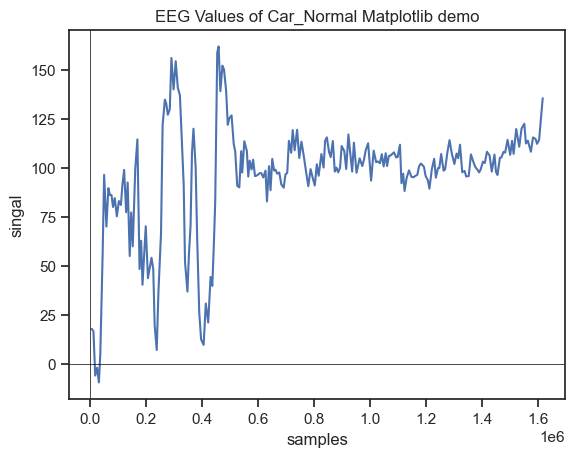

In [ ]:
x = np.arange(0, len(values_car_normal))

plt.title("EEG Values of Car_Normal Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(times_car_normal,values_car_normal)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
import random
rnd_idx = random.randint(0, len(times_car_normal))
print(rnd_idx)
random_data = list(range(rnd_idx-60, rnd_idx+240))
rnd_values = [CP3_data[i] for i in random_data]
print(len(rnd_values))

146
300


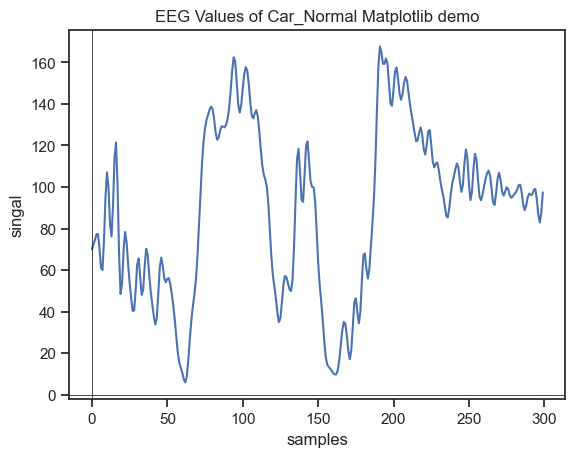

In [ ]:
x = np.arange(0, len(rnd_values))
plt.title("EEG Values of Car_Normal Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,rnd_values)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
vpae_dict['mrk']['time']
times_car_brake = [int(vpae_dict['mrk']['time'][i]/5) for i in indices_car_brake[0]]
print(np.max(times_car_brake))
len(CP3_data)

1615157


1619936

In [ ]:
import random
rnd_idx = random.randint(0, len(times_car_brake))
print(rnd_idx)
random_data = list(range(rnd_idx-60, rnd_idx+240))
rnd_values = np.array([[CP3_data[i] for i in range(rnd_idx-60, rnd_idx+240)] for rnd_idx in times_car_brake])
print(rnd_values[0])

'''
x = np.arange(0, len(rnd_values))
plt.title("EEG Values of Car_Normal Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,rnd_values)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()
'''

136
[ 83.67352611  83.98681984  82.8541425   83.09513768  87.21615524
  94.27731398 100.10939731 101.26617417  98.06093829  93.55432845
  90.34909257  88.97542005  89.02361908  90.56598823  93.38563182
  96.06067831  96.54266867  94.25321447  90.59008775  87.4330509
  85.26409429  83.91452129  83.72172515  85.23999478  87.81864319
  89.09591764  87.74634464  85.86658224  87.48124994  93.14463664
  97.65124649  95.07259807  86.27627404  79.7453047   83.04693865
  94.39781157 103.84482259 104.06171825  97.89224167  93.98811977
  96.51856915 101.4348708  102.5193491   99.50690937  97.5307489
  99.79610358 103.70022548 104.3991115  101.02517899  97.07285806
  95.77148409  97.00055951  98.35013251  98.42243106  97.38615179
  95.48228988  92.66264629  89.33691282  86.85466247  86.17987597
  86.90286151  87.62584705  87.62584705  87.62584705  88.80672342
  91.31307328  93.91582122  95.21719518  94.78340386  93.55432845
  92.49394966  91.86736219  91.16847618  90.08399787  89.14411667
  89.095

' \nx = np.arange(0, len(rnd_values))\nplt.title("EEG Values of Car_Normal Matplotlib demo") \nplt.xlabel("samples") \nplt.ylabel("singal") \nplt.plot(x,rnd_values) \nplt.axhline(0, color=\'black\', linewidth=.5)\nplt.axvline(0, color=\'black\', linewidth=.5)\nplt.show()\n'

In [ ]:
mean_erp = rnd_values.mean(axis=1)

In [ ]:
mean_erp[0]

81.76323766098048

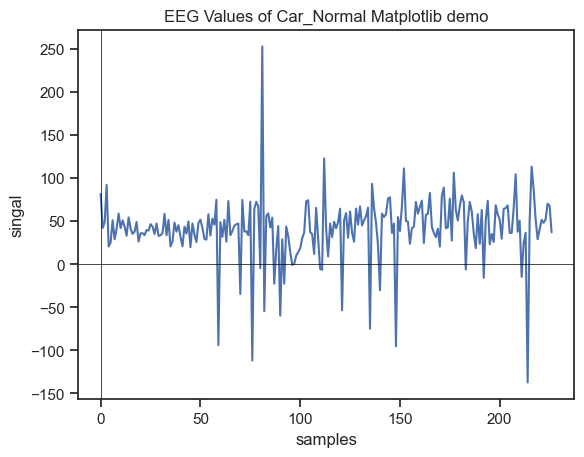

In [ ]:
x = np.arange(0, len(mean_erp))
plt.title("EEG Values of Car_Normal Matplotlib demo")
plt.xlabel("samples")
plt.ylabel("singal")
plt.plot(x,mean_erp)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.show()

In [ ]:
%matplotlib inline
import numpy as np

import mne, glob

In [ ]:
import mat73
import numpy as np

import mne, glob

participant_data = mat73.loadmat('VPae.mat')

In [ ]:
CP3_data = np.array([participant_data['cnt']['x'][i][35] for i in range(len(participant_data['cnt']['x']))])


NameError: name 'np' is not defined

In [ ]:
import mne
import numpy as np
full_data = np.array(vpae_dict['cnt']['x'])
full_data = np.rollaxis(full_data,1,0)
full_data = full_data[np.newaxis, ...]
#print(full_data[0])
print(full_data.shape)

(1, 69, 1619936)


In [ ]:
chan_names = ['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1' , 'Fz' , 'F2' , 'F4' , 'F6' , 'F8' , 'FT7' , 'FC5' , 'FC3' ,
              'FC1' , 'FCz' , 'FC2' , 'FC4' , 'FC6' , 'FT8' , 'T7' , 'C5' , 'C3' , 'C1' , 'Cz' , 'C2' , 'C4' , 'C6' , 'T8' , 'TP7' , 'CP5' ,
              'CP3' , 'CP1' , 'CPz' , 'CP2' , 'CP4' , 'CP6' , 'TP8' , 'P9' , 'P7' , 'P5' , 'P3' , 'P1' , 'Pz' , 'P2' , 'P4' , 'P6' , 'P8' ,
            'P10' , 'PO7' , 'PO3' , 'POz' , 'PO4' , 'PO8' , 'O1' , 'Oz' , 'O2' , 'EMGf' , 'lead_gas','lead_brake','dist_to_lead',
              'wheel_X','wheel_Y','gas','brake']


eeg_data = np.delete(full_data, 0, 1)
eeg_data = np.delete(eeg_data, 4, 1)
eeg_data = np.delete(eeg_data, np.s_[59:], 1)
print(eeg_data.shape)

eeg_names = chan_names[1:61]
eeg_names.pop(4)
print(len(eeg_names))

(1, 59, 1619936)
59


In [ ]:
sfreq = 200

In [ ]:
"""We need the following information to create MNE structure:
    data ([ndarray]): [trials x chans x samples]
    y ([ndarray]):    [class label array  [1, labels]]
    sfreq ([int]):    [sampling frequency]
    event_id ([dict]): [{1 :'pos', -1 : 'neg'} - class labels id]
    chan_names ([list]): [channel names in a list of strings]
"""

sfreq = 200

n_channels = 59

# Initialize an info structure
info = mne.create_info(
        ch_names = eeg_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq
        )

info.set_montage('standard_1020')
print('Event created :', info)

Event created : <Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 62 items (3 Cardinal, 59 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 200.0 Hz
>


In [ ]:
Y  = vpae_dict['mrk']['y']


In [ ]:
Y.shape

(5, 914)

In [ ]:
Y  = vpae_dict['mrk']['y']
Y = np.rollaxis(Y, 1, 0)


In [ ]:
Y.shape

(914, 5)

In [ ]:
Y[:10,:]


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
Y  = vpae_dict['mrk']['y']
Y = np.rollaxis(Y, 1, 0)
loc, ind = np.where(Y>0)


In [ ]:
np.unique(ind)


array([0, 1, 2, 3, 4], dtype=int64)

In [ ]:
Y  = vpae_dict['mrk']['y']
Y = np.rollaxis(Y, 1, 0)
loc, ind = np.where(Y>0)
np.unique(ind)
labels = ind + 1


In [ ]:
labels.shape



(914,)

In [ ]:
event_id = dict(car_normal = 1, car_brake = 2,	car_hold = 3,	car_collision = 4,	react_emg = 5)#Foot = 1, Left_Hand = 2, Right_Hand = 3, Rest = 4)


In [ ]:
event_id = dict(car_normal = 1, car_brake = 2,	car_hold = 3,	car_collision = 4,	react_emg = 5)

eventLength = Y.shape[0]
ev = np.array([int(vpae_dict['mrk']['time'][i]/5) for i in range(eventLength)])
ev = np.delete(ev, 578, 0)
labels = np.delete(labels, 578, 0)
#print(ev == np.unique(ev))

In [ ]:
import pandas as pd
s = pd.Series(ev)
s.value_counts()

5526       1
1047905    1
1054752    1
1054840    1
1054861    1
          ..
504603     1
505109     1
512108     1
512168     1
1615755    1
Name: count, Length: 913, dtype: int64

In [ ]:
events = np.column_stack((np.array(ev),
                          np.zeros(eventLength-1,  dtype = int),
                          np.array(labels)))

In [ ]:
events[0:5]

array([[ 5526,     0,     2],
       [ 5593,     0,     5],
       [ 5625,     0,     3],
       [ 6130,     0,     1],
       [11528,     0,     2]], dtype=int64)

In [ ]:
eeg_data.shape

(1, 59, 1619936)

In [ ]:
event_id


{'car_normal': 1,
 'car_brake': 2,
 'car_hold': 3,
 'car_collision': 4,
 'react_emg': 5}

In [ ]:

tmin = 0
        # Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(eeg_data, info, events, tmin, event_id) #, event_repeated='drop')


Not setting metadata
913 matching events found


ValueError: The number of epochs and the number of events must match

In [ ]:
nr_samples = 10000
nr_channels = 20
#ch_names = ['chan%i' %i for i in range(nr_channels)]
#info = mne.create_info(ch_names=ch_names, sfreq=1000)
#data = np.zeros((nr_channels,nr_samples))
raw = mne.io.RawArray(eeg_data[0],info)

#events = np.array([[1000, 0, 1],[1000, 0, 2]])
epo = mne.Epochs(raw,events,event_repeated='drop')

Creating RawArray with float64 data, n_channels=59, n_times=1619936
    Range : 0 ... 1619935 =      0.000 ...  8099.675 secs
Ready.


Not setting metadata
913 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
epo.get_data()

Using data from preloaded Raw for 913 events and 141 original time points ...
0 bad epochs dropped


array([[[ -7.56531323,  -8.54742919,  -6.17754067, ..., -16.59651004,
         -13.56476075,  -9.35874238],
        [ -7.39071988,  -9.02179145, -10.05320435, ..., -13.55521093,
         -12.14001649, -12.02008476],
        [ -8.67238944, -10.08435174,  -9.74817024, ..., -13.98405714,
         -13.42375464, -12.93068844],
        ...,
        [ -7.94281393,  -9.04205283,  -9.9775753 , ...,  -8.85494834,
          -5.69756001,  -0.80945511],
        [ -6.30155   ,  -8.62402133,  -9.69417968, ..., -16.13789914,
          -9.26156248,   1.87263828],
        [ -6.30394725,  -9.28293819,  -9.39751477, ..., -12.5139976 ,
          -3.6228554 ,   9.46178943]],

       [[ -0.16090871,  -1.6981337 ,  -2.08243995, ..., -22.60012348,
         -19.16271761, -18.99191483],
        [ -0.18428535,   0.79915486,   3.34170759, ..., -27.8645292 ,
         -26.5212938 , -25.60981263],
        [  1.41906858,   2.42761308,   2.60690988, ..., -29.46480525,
         -27.87354615, -26.61846855],
        ...,


In [ ]:
#epo.average().plot()

In [ ]:
data = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]

In [ ]:
data = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]

In [ ]:
len(data)
data.pop(578)

array([[-5.38851300e+00,  3.61674879e+01,  7.17191760e+01, ...,
        -7.83850264e-03, -7.95118920e-03,  1.97650086e-05],
       [-4.70270226e+00,  3.58045320e+01,  7.06637768e+01, ...,
        -7.83850264e-03, -7.92066640e-03, -1.97650086e-05],
       [-4.50675633e+00,  3.73844577e+01,  7.10715447e+01, ...,
        -7.83850264e-03, -7.89014360e-03,  5.92950257e-05],
       ...,
       [ 5.89797241e+01, -5.50838954e+00,  1.46316714e+01, ...,
        -7.83850264e-03,  3.52980912e-01,  1.35983259e-02],
       [ 5.91756701e+01, -4.41952184e+00,  1.47036304e+01, ...,
        -7.83850264e-03,  3.52797775e-01,  1.36773859e-02],
       [ 6.09391834e+01, -6.02079787e+00,  1.22810094e+01, ...,
        -7.83850264e-03,  3.52874082e-01,  1.33809108e-02]])

In [ ]:
data.pop(578)

npdata = np.array(data)
npdata = np.swapaxes(npdata, 1,2)
npdata = np.delete(npdata, 0, 1)
npdata = np.delete(npdata, 4, 1)
npdata = np.delete(npdata, np.s_[59:], 1)

print(npdata.shape)

(913, 59, 300)


In [ ]:

tmin = 0
        # Create the :class:`mne.EpochsArray` object
epochs = mne.EpochsArray(npdata, info, events, tmin, event_id) #, event_repeated='drop')


Not setting metadata
913 matching events found
No baseline correction applied
0 projection items activated


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


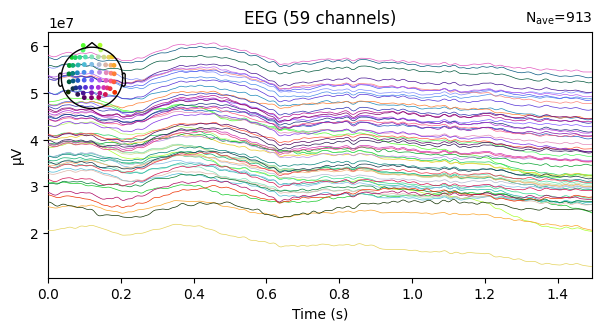

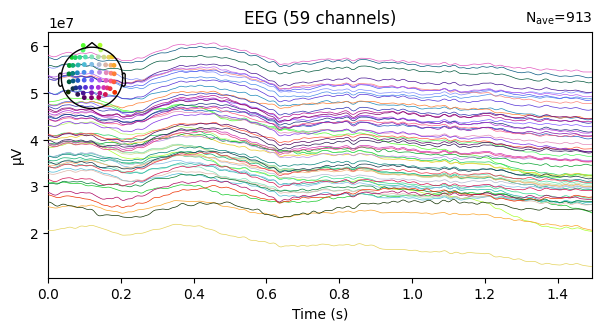

In [ ]:
epochs.average().plot()

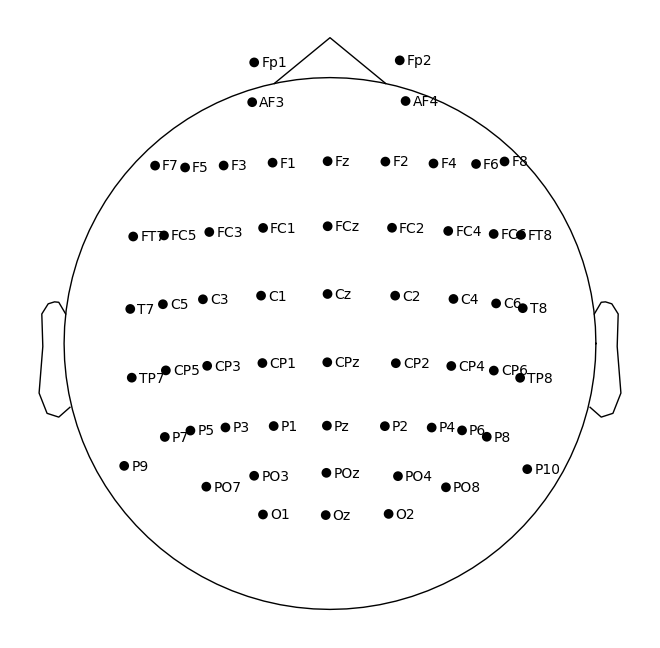

In [ ]:
epochs.plot_sensors(show_names=True);


In [ ]:
epochs

<EpochsArray |  913 events (all good), 0 – 1.495 s, baseline off, ~123.4 MB, data loaded,
 'car_normal': 230
 'car_brake': 227
 'car_hold': 230
 'car_collision': 25
 'react_emg': 201>

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


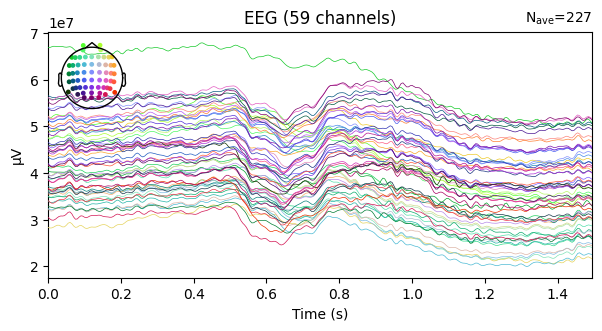

In [ ]:
epochs['car_brake'].average().plot();


In [ ]:
epochs.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Evoked | '0.25 × car_normal + 0.25 × car_brake + 0.25 × car_hold + 0.03 × car_collision + 0.22 × react_emg' (average, N=913), 0 – 1.495 s, baseline off, 59 ch, ~223 kB>

In [ ]:
vpae_dict['cnt']['x'].shape
raw_data = np.swapaxes(np.array(vpae_dict['cnt']['x']), 0, 1)

raw_data = np.delete(raw_data, 0, 0)
raw_data = np.delete(raw_data, 4, 0)
raw_data = np.delete(raw_data, np.s_[59:], 0)

print(raw_data.shape)

(59, 1619936)


In [ ]:
raw_eeg = mne.io.RawArray(raw_data,info)

Creating RawArray with float64 data, n_channels=59, n_times=1619936
    Range : 0 ... 1619935 =      0.000 ...  8099.675 secs
Ready.


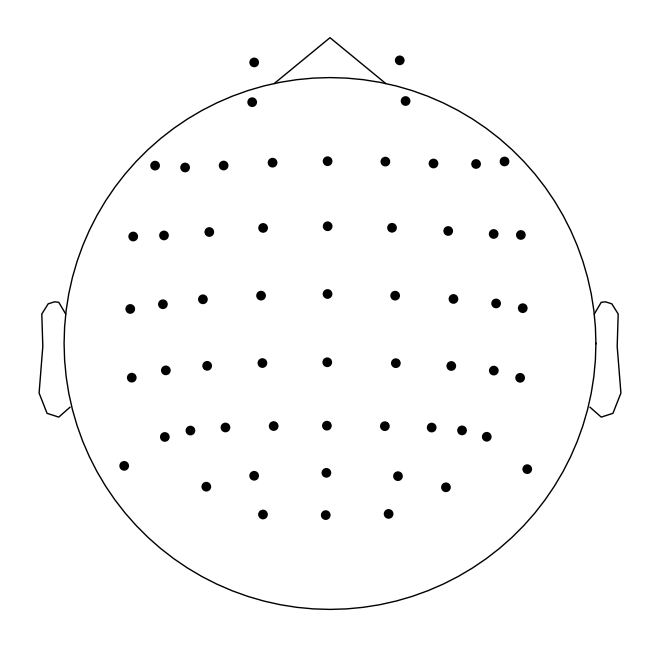

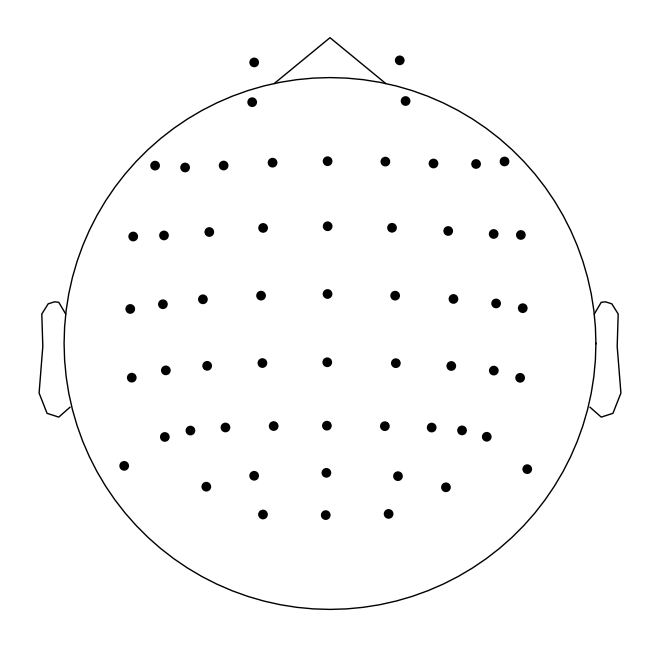

In [ ]:
raw_eeg.plot_sensors()

Using matplotlib as 2D backend.


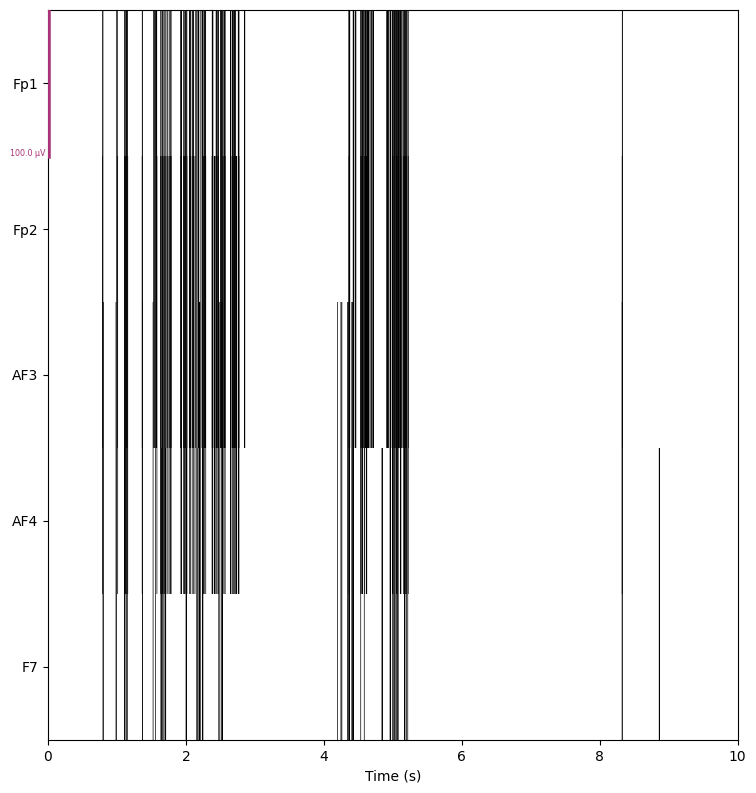

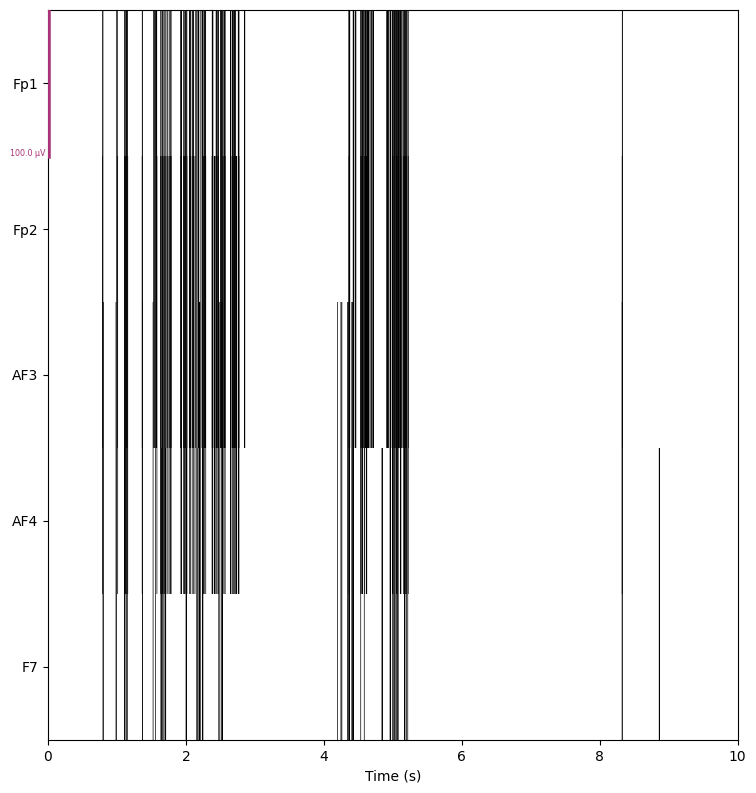

In [ ]:
for proj in (False, True):
    with mne.viz.use_browser_backend("matplotlib"):
        fig = raw_eeg.plot(
            n_channels=5, proj=proj, scalings=dict(eeg=50e-6), show_scrollbars=False
        )
    fig.subplots_adjust(top=0.9)  # make room for title
    ref = "Average" if proj else "No"
    fig.suptitle(f"{ref} reference", size="xx-large", weight="bold")

In [ ]:
epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-0.3, tmax=1.2, preload=True)
#fig = epochs.plot(events=events)

Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped


In [ ]:
# reject_criteria = dict(eeg=500e-6)#, eog=200e-6)  # 100 µV, 200 µV
# epochs.drop_bad(reject=reject_criteria)

In [ ]:
cbr = epochs["car_brake"].average()#.pick_channels(["FT8"]).average()
cbr1 = epochs["car_brake"].pick_channels(["C6"]).average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


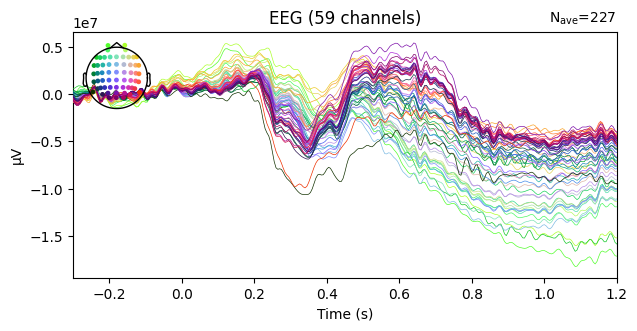

Need more than one channel to make topography for eeg. Disabling interactivity.


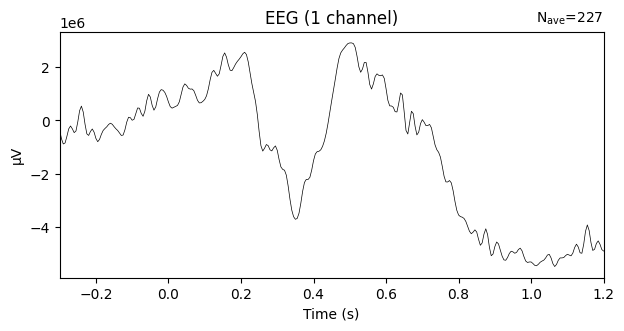

In [ ]:
fig1 = cbr.plot()
fig2 = cbr1.plot(spatial_colors=True)

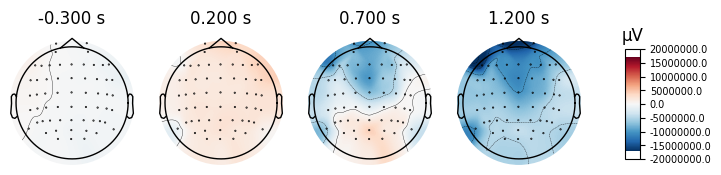

In [ ]:
fig3 = cbr.plot_topomap()

In [ ]:
data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time'])-1)]

In [ ]:
data_pairs[0:5]

[(27630.0, 27965.0),
 (27965.0, 28125.0),
 (28125.0, 30650.0),
 (30650.0, 57640.0),
 (57640.0, 58065.0)]

In [ ]:
data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time']))]
data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]

TypeError: ignored

In [ ]:
data_pairs[0:5]

NameError: ignored

In [ ]:
#data = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]
len = 300
non_targets = []
for pr in data_pairs:
    counter = pr[0] + 600
    while (counter < pr[1]-900):
        non_targets.append(vpae_dict['cnt']['x'][counter:counter+len+1])
        counter += len+1




In [ ]:
non_targets[0]

array([[ 5.87837782e-01,  3.45021609e+01,  5.80709449e+01, ...,
         0.00000000e+00,  0.00000000e+00, -2.17415094e-04],
       [-2.93918891e-01,  3.25592793e+01,  5.55763648e+01, ...,
         0.00000000e+00,  0.00000000e+00, -2.56945111e-04],
       [-1.37162149e+00,  3.15558130e+01,  5.38973206e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.94695890e+01,  5.95461180e+01,  9.17237890e+01, ...,
         0.00000000e+00,  0.00000000e+00,  3.95300171e-05],
       [-5.77060756e+01,  6.03147305e+01,  9.08123078e+01, ...,
         0.00000000e+00,  0.00000000e+00, -5.92950257e-05],
       [-5.42770219e+01,  6.29621735e+01,  9.01406901e+01, ...,
         0.00000000e+00,  0.00000000e+00, -1.97650086e-05]])

In [ ]:
npNonTarget = np.array(non_targets)
npNonTarget = np.swapaxes(npNonTarget, 1,2)
npNonTarget = np.delete(npNonTarget, 0, 1)
npNonTarget = np.delete(npNonTarget, 4, 1)
npNonTarget = np.delete(npNonTarget, np.s_[59:], 1)

print(npNonTarget.shape)

(3837, 59, 301)


Not setting metadata
913 matching events found


ValueError: The number of epochs and the number of events must match

In [ ]:
import numpy as np
import mat73
vpae_dict = mat73.loadmat('VPae.mat')

In [ ]:
gasData = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240][68] for idx in vpae_dict['mrk']['time'] ]

In [ ]:
vpae_dict['mrk']['y'].shape

(5, 914)

In [ ]:
time_rolled = np.swapaxes(vpae_dict['mrk']['y'], 0, 1)

In [ ]:
data_rolled = np.swapaxes(vpae_dict['cnt']['x'], 0, 1)

In [ ]:
time_rolled[-1][1]

0.0

In [ ]:
time_rolled.shape

(914, 5)

In [ ]:
np.array(gasData).shape

(227, 69)

In [ ]:
gasData = [gasData[i] for i in range(len(gasData)) if time_rolled[i][1] == 0.0]

In [ ]:
np.array(gasData).shape

(41, 69)

In [ ]:
gasMean = np.mean(gasData, axis=1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
data = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]

In [ ]:
df = pd.DataFrame(data)

ValueError: Must pass 2-d input. shape=(914, 300, 69)

In [ ]:
type(raw_eeg)

mne.io.array.array.RawArray

In [ ]:
# TR = epochs['car_normal'].pick_channels(['POz']).get_data()
len = 300
TR = epochs['car_brake'].get_data()
TR = np.swapaxes(TR, 1, 2)
TR = TR[0:,0:len+1,0:]
print(TR.shape)
# print(len(TR))

(227, 301, 59)


In [ ]:
plt.plot(TR[0])

In [ ]:
TR = np.swapaxes(TR, 0, 1)
TR = np.mean(TR, axis=2)
TR = np.swapaxes(TR, 0, 1)
# TR = np.mean(TR, axis=1)

In [ ]:
TR.shape

(227, 301)

In [ ]:
# FL = epochs['car_brake'].pick_channels(['POz']).get_data()
FL = npNonTarget.copy()

In [ ]:
FL = npNonTarget.copy()
FL = np.swapaxes(FL, 1, 2)

In [ ]:
FL = npNonTarget.copy()
FL = np.swapaxes(FL, 1, 2)
FL = np.swapaxes(FL, 0, 1)
FL = np.mean(FL, axis=2)
FL = np.swapaxes(FL, 0, 1)
# FL = np.mean(FL, axis=1)


In [ ]:
print(FL.shape)

(3837, 301)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


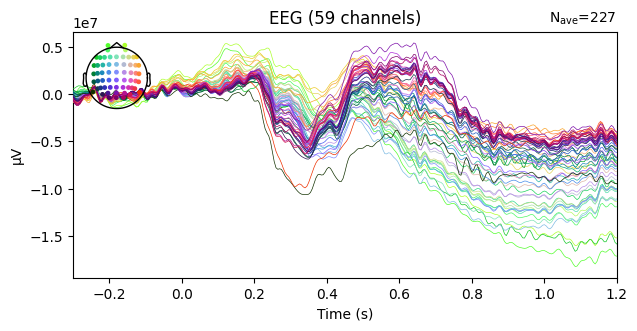

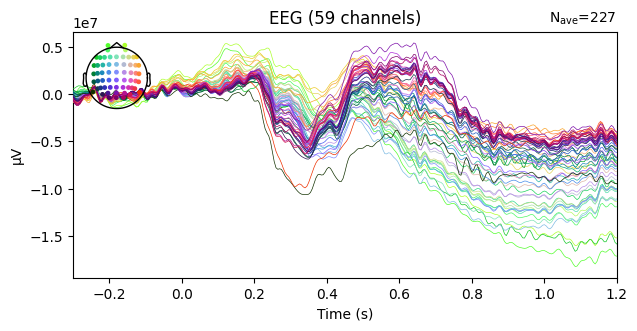

In [ ]:
epochs['car_brake'].average().plot()

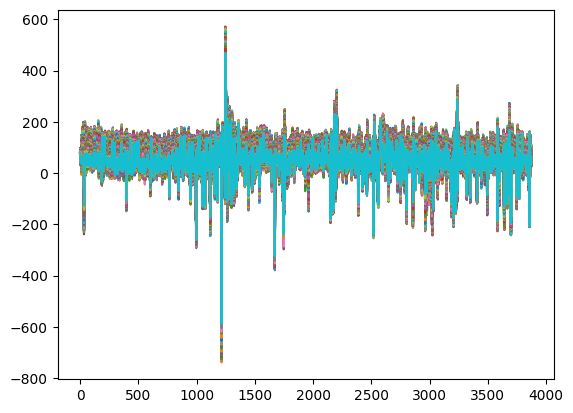

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# x = np.arange(len(TR))

# plt.plot(x,TR)
# plt.plot(TR)
plt.plot(FL)

In [ ]:
array_3d = np.random.rand(10, 10, 10)
array_3d.shape

(10, 10, 10)

AttributeError: 'numpy.ndarray' object has no attribute 'non_zero'

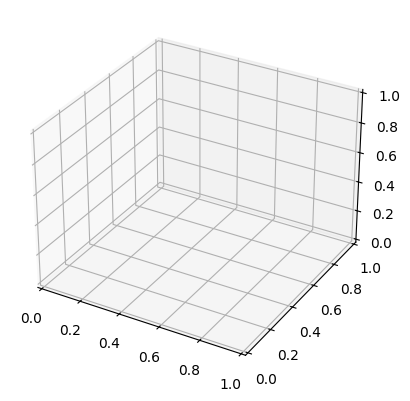

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = TR.non_zero()
ax.scatter(x, y, z, zdir='z', c= 'red')
# plt.savefig("demo.png")

In [ ]:
# TR = np.squeeze(TR, axis=1)
# FL = np.squeeze(FL, axis=1)
Trl = [0 for sample in range(TR.shape[0])]
Fll = [1 for sample in range(FL.shape[0])]

In [ ]:
X = np.concatenate((TR, FL))

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
# X_train = lda.fit(X_train, y_train)
lda.fit(X_train, y_train)
# X_test = lda.transform(X_test)

LinearDiscriminantAnalysis(n_components=1)

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
# X_train = lda.fit(X_train, y_train)
lda.fit(X_train, y_train)
# X_test = lda.transform(X_test)

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)
y_pred = lda.predict(X_test)

In [ ]:
X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
# X_train = lda.fit(X_train, y_train)
lda.fit(X_train, y_train)
# X_test = lda.transform(X_test)

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)
y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print('Accuracy: ', acc)

[[  2  46]
 [ 19 746]]
Accuracy:  0.9200492004920049


In [ ]:
from sklearn.metrics import roc_auc_score

X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
# X_train = lda.fit(X_train, y_train)
lda.fit(X_train, y_train)
# X_test = lda.transform(X_test)

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)
y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print('Accuracy: ', acc)

y_pred_proba = lda.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: ', auc_score)


[[  2  46]
 [ 19 746]]
Accuracy:  0.9200492004920049
AUC Score:  0.8255446623093682


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

X = np.concatenate((TR, FL))
y = np.concatenate((Trl, Fll))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)
# X_train = lda.fit(X_train, y_train)
lda.fit(X_train, y_train)
# X_test = lda.transform(X_test)

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
# classifier.fit(X_train, y_train)
y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print('Accuracy: ', acc)

y_pred_proba = lda.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print('AUC Score: ', auc_score)



f1 = f1_score(y_test, y_pred)
print('F1 Score: ', f1)


[[  2  46]
 [ 19 746]]
Accuracy:  0.9200492004920049
AUC Score:  0.8255446623093682
F1 Score:  0.9582530507385999


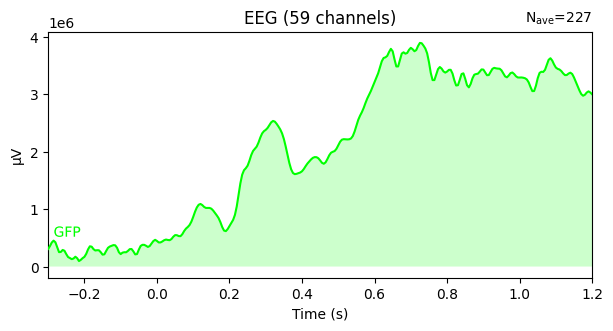

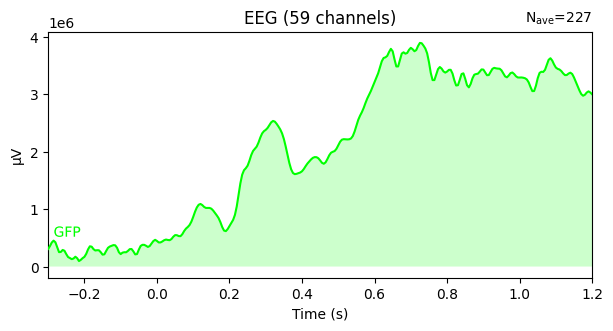

In [ ]:
# cbr.plot()
cbr.plot(gfp="only")#, spatial_colors=True, ylim=dict(eeg=[-12, 12]))

In [ ]:
from collections import defaultdict

d1 = {1: 2, 3: 4}
d2 = {1: 6, 3: 7}
d3 = {1: 11, 3: 10}

dd = defaultdict(list)

for d in [d1, d2, d3]: # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})

defaultdict(<class 'list'>, {1: [2, 6, 11], 3: [4, 7, 10]})


In [ ]:
dd[1]

[2, 6, 11]

In [ ]:
epochs = load_MATLAB_data("VPae.mat")
# epochs2 = load_MATLAB_data("VPdx.mat")

TR = epochs['car_brake'].get_data()
print(TR.shape)
TR = np.concatenate((TR, epochs2['car_brake'].get_data()))

print(TR.shape)

TR = np.empty([0, 59,301])
print(TR)


NameError: ignored

In [5]:
vpae_dict = mat73.loadmat("VPae.mat")
epochs = load_MATLAB_data(participant_data=vpae_dict)



Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped


In [3]:
from tqdm import tqdm
import mat73
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.decomposition import PCA



#
vpae_dict = mat73.loadmat("VPgae.mat")
raw_eeg, epoch = load_MATLAB_data(participant_data=vpae_dict)

Creating RawArray with float64 data, n_channels=59, n_times=1619688
    Range : 0 ... 1619687 =      0.000 ...  8098.435 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
973 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 973 events and 301 original time points ...
0 bad epochs dropped


In [142]:
AUC_Matrix = []
F1_Matrix = []
Acc_Matrix = []

In [155]:
print(npNonTarget.shape)
print(npTarget.shape)

(3837, 59, 301)
(227, 59, 301)


In [63]:
# print(vpdx_raw[0].get_data().shape)
print(epoch[0].get_data().shape)
print(vpae_dict['cnt']['x'].shape)

(1, 59, 301)
(1619936, 69)


In [5]:
import numpy as np
length = 240

raw_data = np.swapaxes(epoch[0].get_data(), 0,1)
targets = []
for i in range(vpae_dict['mrk']['time'].shape[0]):
    if (vpae_dict['mrk']['y'][1][i]):
        t = int(vpae_dict['mrk']['time'][i]/5)
        targets.append(vpae_dict['cnt']['x'][t+length-300:t+length+1])

npTarget = np.array(targets)
npTarget = np.swapaxes(npTarget, 1,2)
npTarget = np.delete(npTarget, 0, 1)
npTarget = np.delete(npTarget, 4, 1)
npTarget = np.delete(npTarget, np.s_[59:], 1)

# print(npNonTarget.shape)
# print(epoch['car_brake'].average().get_data().shape)
# npFiltered = np.where(np.mean(non_targets, axis=(1) > 1)
# npFiltered = np.where(np.mean(npNonTarget, axis=(0,2)) > 48)
# npTarget = np.delete(npTarget, npFiltered, 1)

# print(npFiltered)
# print(np.mean(npTarget, axis=(0,1)).shape)
# plt.plot(np.mean(npTarget, axis=(0,1)))
# plt.plot(np.mean(npNonTarget, axis=(0,1)))

In [134]:
raw_data.plot(
    events=events,
    start=5,
    duration=10,
    color="gray",
)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [7]:
# mat_dicts = [mat73.loadmat(file) for file in tqdm(mat_files[0:5])]
# mat_epochs = [load_MATLAB_data(participant_data=mdict) for mdict in mat_dicts]

M = 301
st = 240

non_targets = []
data_pairs = list(zip(vpae_dict['mrk']['time'], vpae_dict['mrk']['time'][1:]))
data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]
# npTarget = np.delete(npTarget, npFiltered, 1)
for pr in data_pairs:
    counter = pr[0] + 600
    while (counter < pr[1]-900):
        non_targets.append(vpae_dict['cnt']['x'][counter:counter+301])
        counter += 301

# data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time'])-1)]
# for vpae_dict in mat_dicts:
npFiltered = np.where(np.std(epoch['car_normal'].average().get_data(), axis=1) > 2)
print(npFiltered)

npNonTarget = np.array(non_targets)
npNonTarget = np.swapaxes(npNonTarget, 1,2)
npNonTarget = np.delete(npNonTarget, 0, 1)
npNonTarget = np.delete(npNonTarget, 4, 1)
npNonTarget = np.delete(npNonTarget, np.s_[59:], 1)
# npNonTarget = np.delete(npNonTarget, npFiltered, 1)

# npNonTarget = mne.baseline.rescale(npNonTarget, )



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int64),)


(206, 301)
(11739, 301)


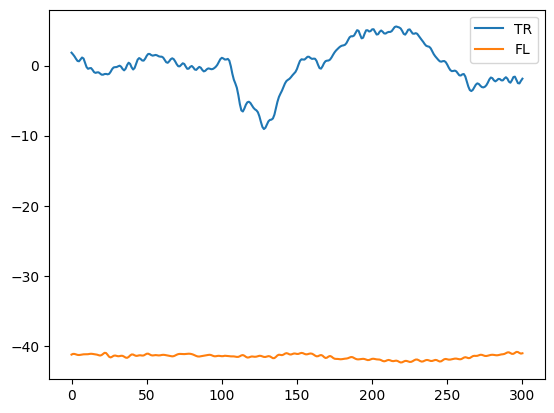

In [136]:
npNonTarget -= np.mean(npTarget) 
npTarget -= np.mean(npTarget) 

print(np.mean(npTarget, axis=1).shape)
print(np.mean(npNonTarget, axis=1).shape)
plt.plot(np.mean(npTarget, axis=(0,1)))
plt.plot(np.mean(npNonTarget, axis=(0,1)))
plt.legend(["TR", "FL"])

In [39]:
npTarget = epochs['car_brake'].get_data()
npNonTarget = epochs['car_normal'].get_data()

In [46]:
# features(itr,1:numEEG) = mean(ADwindow);       
# % standard deviation
# features(itr,numEEG+1:2*numEEG) = std(ADwindow); 
# % activity
# features(itr,2*numEEG+1:3*numEEG) = var(ADwindow); 
# % mobility and complexity
# for d = 1:numEEG
#     ADwd0 = ADwindow(:,d);
#     ADwd1 = zeros(1,length(ADwd0));
#     ADwd2 = zeros(1,length(ADwd0));
#     for d1 = 2:length(ADwd0)
#         ADwd1(d1) = ADwd0(d1) - ADwd0(d1-1);
#     end
#     % mobility
#     features(itr,3*numEEG+d) = std(ADwd1)/std(ADwd0); 
#     for d2=3:length(ADwd0)
#         ADwd2(d2) = ADwd0(d2) - 2*ADwd0(d2-1) + ADwd0(d2-2);
#     end
#     FF = (std(ADwd2)/std(ADwd1))/(std(ADwd1)/std(ADwd0));
#     % complexity
#     features(itr,4*numEEG+d) = FF;
# end           

targetFeatures = []
nonTargetFeatures = []

for x in npTarget:
    targetFeatures.append([np.mean(x), np.std(x), np.var(x)])
    for d in range(0, x.shape[0]):
        # print(x.shape)
        if np.std(x[d-1]) != 0 and np.std(x[d-2]) != 0 and np.std(x[d]) != 0:
            targetFeatures[-1].append(np.std(x[d])/np.std(x[d-1]))
            targetFeatures[-1].append((np.std(x[d-1])/np.std(x[d-2]))/(np.std(x[d])/np.std(x[d-1])))
        else:
            targetFeatures[-1].append(0)
            targetFeatures[-1].append(0)
       
for x in npNonTarget:
    nonTargetFeatures.append([np.mean(x), np.std(x), np.var(x)])
    for d in range(0, x.shape[0]):
        if np.std(x[d-1]) != 0 and np.std(x[d-2]) != 0 and np.std(x[d]) != 0:
            nonTargetFeatures[-1].append(np.std(x[d])/np.std(x[d-1]))
            nonTargetFeatures[-1].append((np.std(x[d-1])/np.std(x[d-2]))/(np.std(x[d])/np.std(x[d-1])))
        else:
            nonTargetFeatures[-1].append(0)
            nonTargetFeatures[-1].append(0)


In [47]:
print(np.array(targetFeatures).shape)
print(np.array(nonTargetFeatures).shape)

(228, 121)
(3864, 121)


In [49]:
TR = np.array(targetFeatures) #.copy()

FL = np.array(nonTargetFeatures) #.copy()
# FL = epochs['car_normal'].get_data()


# plt.figure(len)
# plt.plot(np.mean(TR, axis=0))    
# plt.plot(np.mean(FL, axis=0))   
# plt.legend(["TR", "FL"]) 
# plt.plot(np.mean(TR, axis=1))
# plt.plot(np.mean(FL, axis=1))

# TR = sc.fit_transform(TR)
# FL = sc.fit_transform(FL)

TrueLabels = [1 for sample in range(TR.shape[0])]
FalseLabels = [0 for sample in range(FL.shape[0])]


X = np.concatenate((TR, FL))
y = np.concatenate((TrueLabels, FalseLabels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = SVC(kernel='linear', probability=True, verbose=True)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(svm.score(X_test, y_test))


KeyboardInterrupt: 

In [25]:
npTarget.shape

(234, 59, 301)

In [107]:
print((vpae_dict['mrk']['time'].shape))
print((vpae_dict['mrk']['y'][1][0:5]))

(914,)
[1. 0. 0. 0. 1.]


  0%|          | 0/8 [00:00<?, ?it/s]

Time  -200


AttributeError: 'list' object has no attribute 'shape'

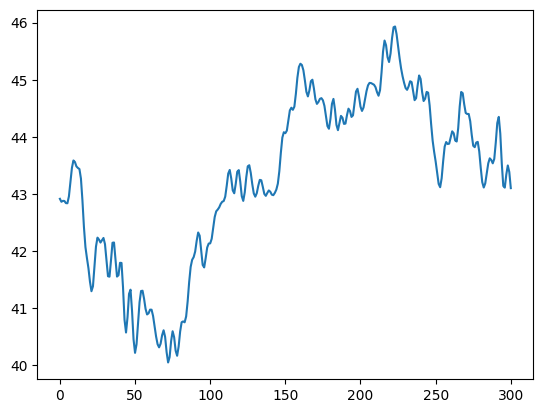

In [180]:
for len in tqdm(range(-40, 241, st)):
    print("Time ", 5*len)
    # len = 200

    targets = []

    # stim_slices = [participant_data['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in participant_data['mrk']['time']]

    for i in range(vpae_dict['mrk']['time'].shape[0]):
        if (vpae_dict['mrk']['y'][1][i] == 1.0):
            t = int(vpae_dict['mrk']['time'][i]/5)
            targets.append(vpae_dict['cnt']['x'][t+len-300:t+len+1])

    npTarget = np.array(targets)
    npTarget = np.swapaxes(npTarget, 1,2)
    npTarget = np.delete(npTarget, 0, 1)
    npTarget = np.delete(npTarget, 4, 1)
    npTarget = np.delete(npTarget, np.s_[59:], 1)

    plt.figure(len)
    plt.plot(np.mean(npTarget, axis=(0,1)))  
    print(targets.shape)

In [19]:


# mat_dicts = [mat73.loadmat(file) for file in tqdm(mat_files[0:5])]
# mat_epochs = [load_MATLAB_data(participant_data=mdict) for mdict in mat_dicts]

# M = 301
st = 4

def train_participant(dir, st):

    vpae_dict = mat73.loadmat(dir)
    raw_eeg, epoch = load_MATLAB_data(participant_data=vpae_dict)


    non_targets = []
    data_pairs = list(zip(vpae_dict['mrk']['time'], vpae_dict['mrk']['time'][1:]))
    data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]
    # npTarget = np.delete(npTarget, npFiltered, 1)
    for pr in data_pairs:
        counter = pr[0] + 600
        while (counter < pr[1]-900):
            non_targets.append(vpae_dict['cnt']['x'][counter:counter+301])
            counter += 301

    # data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time'])-1)]
    # for vpae_dict in mat_dicts:
    npFiltered = np.where(np.std(epoch['car_normal'].average().get_data(), axis=1) > 2)
    print(npFiltered)

    npNonTarget = np.array(non_targets)
    npNonTarget = np.swapaxes(npNonTarget, 1,2)
    npNonTarget = np.delete(npNonTarget, 0, 1)
    npNonTarget = np.delete(npNonTarget, 4, 1)
    npNonTarget = np.delete(npNonTarget, np.s_[59:], 1)
    # npNonTarget = np.delete(npNonTarget, npFiltered, 1)

    # npNonTarget = mne.baseline.rescale(npNonTarget, )

    search_AUC_scores = []
    search_accuracies = []
    search_cm_matrices = []
    search_F1_scores = []

    AUC_scores = []
    accuracies = []
    cm_matrices = []
    F1_scores = []

    SVMAUC_scores = []
    SVMaccuracies = []
    SVMcm_matrices = []
    SVMF1_scores = []


    # st = 40

    indices = list(np.where(vpae_dict['mrk']['y'][1] == 1.0)[0])
    times = [vpae_dict['mrk']['time'][x] for x in indices]


    for length in tqdm(range(-340, -60, st)):
        print("Time ", 1500+5*length)
        length = -60

        # targets = []
        # for i in range(vpae_dict['mrk']['time'].shape[0]):
        #     if (vpae_dict['mrk']['y'][1][i]):
        #         t = int(vpae_dict['mrk']['time'][i]/5)
        #         targets.append(vpae_dict['cnt']['x'][t+len-300:t+len+1])

        # stim_slices = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]
        targets = np.array([vpae_dict['cnt']['x'][int(idx/5)+length-1:int(idx/5)+length+300] for idx in times])
        # targets = [vpae_dict['cnt']['x'][int(idx/5)+len:int(idx/5)+len+1] for idx in times]


        npTarget = np.array(targets)
        npTarget = np.swapaxes(npTarget, 1,2)
        npTarget = np.delete(npTarget, 0, 1)
        npTarget = np.delete(npTarget, 4, 1)
        npTarget = np.delete(npTarget, np.s_[59:], 1)
        npTarget = np.delete(npTarget,npFiltered, 1)

        npNonTarget = npNonTarget - np.mean(npNonTarget)
        npNonTarget = npNonTarget / np.std(npNonTarget)
        npTarget = npTarget - np.mean(npTarget)
        npTarget = npTarget / np.std(npTarget)

        # sc = StandardScaler()
        # TR = np.empty((0, 59,301))
        # for epoch in mat_epochs:
        #   TR = np.concatenate((TR, epoch['car_brake'].get_data()))

        # TR = epoch['car_brake'].get_data()

        # del mat_dicts
        # del mat_epochs
        # gc.collect()

        # npTarget = np.rollaxis(npTarget, 0, 1)
        # print(npTarget.shape)
        # print(npNonTarget.shape)

        TR = npTarget #.copy()
        TR = np.swapaxes(TR, 1, 2)
        # TR = TR[0:,0:len+1,0:]
        TR = np.swapaxes(TR, 0, 1)
        # print(TR.shape)
        TR = np.mean(TR, axis=2)
        TR = np.swapaxes(TR, 0, 1)

        FL = npNonTarget #.copy()
        # FL = epochs['car_normal'].get_data()
        FL = np.swapaxes(FL, 1, 2)
        # FL = FL[0:,0:len+1,0:]
        FL = np.swapaxes(FL, 0, 1)
        FL = np.mean(FL, axis=2)
        FL = np.swapaxes(FL, 0, 1)

        # plt.figure(len)
        # plt.plot(np.mean(TR, axis=0))    
        # plt.plot(np.mean(FL, axis=0))   
        # plt.legend(["TR", "FL"]) 
        # plt.plot(np.mean(TR, axis=1))
        # plt.plot(np.mean(FL, axis=1))

        # TR = sc.fit_transform(TR)
        # FL = sc.fit_transform(FL)

        TrueLabels = [1 for sample in range(TR.shape[0])]
        FalseLabels = [0 for sample in range(FL.shape[0])]

        X = np.concatenate((TR, FL))
        y = np.concatenate((TrueLabels, FalseLabels))

    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        pca = PCA(n_components=10)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        # sc = StandardScaler()
        # X_train = sc.fit_transform(X_train)
        # X_test = sc.transform(X_test)

        lda = LDA(n_components=1)
        lda.fit(X_train, y_train)

        y_pred = lda.predict(X_test)
        tn1, fp1, fn1, tp1 = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

        # print("Before SMOTE")
        # print('True Positive :', tp1)
        # print('True Negative :', tn1)
        # print('False Positive :', fp1)
        # print('False Negative :', fn1)
        # print("Precision score",np.round(precision_score(y_test, y_pred),3))






        cm1 = confusion_matrix(y_test, y_pred)
        acc1 = accuracy_score(y_test, y_pred)
        y_pred_proba = lda.predict_proba(X_test)[:, 1]
        auc_score1 = roc_auc_score(y_test, y_pred_proba)
        f11 = f1_score(y_test, y_pred)

        search_AUC_scores.append(auc_score1)
        search_F1_scores.append(f11)
        search_cm_matrices.append(cm1)
        search_accuracies.append(acc1)

        # print('Accuracy :', acc1)
        # print('AUC Score :', auc_score1)
        # print('F1 Score :', f11)


        # lda_1 = DiscriminentAnalysis()
        # lda_1.fit(X,y)

        oversample = SMOTE()
        Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.2, random_state=42)
        Xs_train, ys_train = oversample.fit_resample(Xs_train, ys_train)

        pca_os = PCA(n_components=10)
        Xs_train = pca_os.fit_transform(Xs_train)
        Xs_test = pca_os.transform(Xs_test)

        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
        grid = dict()
        grid['solver'] = ['eigen','lsqr']
        grid['shrinkage'] = ['auto',0.2,1,0.3,0.5]
        search = GridSearchCV(LDA(), grid, scoring='precision', cv=cv, n_jobs=8)
        results = search.fit(Xs_train, ys_train)

        # print('Precision: %.3f' % results.best_score_)
        # print('Configuration:',results.best_params_)

        # y2_pred = search.predict(ys_test)
        # cm2 = confusion_matrix(ys_test, y2_pred)
        # acc2 = accuracy_score(ys_test, y2_pred)
        # y2_pred_proba = lda.predict_proba(Xs_test)[:, 1]
        # auc_score2 = roc_auc_score(ys_test, y2_pred_proba)
        # f12 = f1_score(ys_test, y2_pred)

        # print('Accuracy :', acc)
        # print('AUC Score :', auc_score)
        # print('F1 Score :', f1)


        LDA_final=LDA(shrinkage='auto', solver='eigen')
        # LDA_final.fit_transform(Xs_train,ys_train)
        LDA_final.fit(Xs_train,ys_train)
        ys_pred = LDA_final.predict(Xs_test)

        # print(X.shape)
        # print(X_smote.shape)
        ConfusionMatrixDisplay.from_predictions(ys_test, ys_pred)
        
        # tn, fp, fn, tp = confusion_matrix(list(ys_test), list(ys_pred), labels=[0, 1]).ravel()
        # print("After SMOTE")
        # print('True Positive :', tp)
        # print('True Negative :', tn)
        # print('False Positive :', fp)
        # print('False Negative :', fn)
        # print("Precision score",np.round(precision_score(ys_test, ys_pred),3))

        cm = confusion_matrix(ys_test, ys_pred)
        acc = accuracy_score(ys_test, ys_pred)
        ys_pred_proba = lda.predict_proba(Xs_test)[:, 1]
        auc_score = roc_auc_score(ys_test, ys_pred_proba)
        f1 = f1_score(ys_test, ys_pred)

        print('LDA Accuracy :', acc)
        print('LDA AUC Score :', auc_score)
        print('LDA F1 Score :', f1)

        AUC_scores.append(auc_score)
        F1_scores.append(f1)
        cm_matrices.append(cm)
        accuracies.append(acc)

        print("Entered SVM:")
        SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
        SVCClf.fit(Xs_train, ys_train)
        ysvm_pred = SVCClf.predict(Xs_test)


        cmSVM = confusion_matrix(ys_test, ysvm_pred)
        accSVM = accuracy_score(ys_test, ysvm_pred)
        ysvm_pred_proba = lda.predict_proba(X_test)[:, 1]
        auc_scoreSVM = roc_auc_score(ys_test, ysvm_pred_proba)
        f1SVM = f1_score(ys_test, ysvm_pred)

        print('SVM Accuracy :', accSVM)
        print('SVM AUC Score :', auc_scoreSVM)
        print('SVM F1 Score :', f1SVM)
        ConfusionMatrixDisplay.from_predictions(ys_test, ysvm_pred)

        SVMAUC_scores.append(auc_scoreSVM)
        SVMF1_scores.append(f1SVM)
        SVMcm_matrices.append(cmSVM)
        SVMaccuracies.append(accSVM)


    return AUC_scores, accuracies, F1_scores, LDA_final, SVCClf, X_test


Creating RawArray with float64 data, n_channels=59, n_times=1619949
    Range : 0 ... 1619948 =      0.000 ...  8099.740 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1669 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1669 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 21, 22, 23, 24, 28, 29, 30, 31, 33, 37, 38, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


  0%|          | 0/1 [00:00<?, ?it/s]

Time  -200
LDA Accuracy : 0.8871359223300971
LDA AUC Score : 0.8007731192387748
LDA F1 Score : 0.4624277456647399
Entered SVM:


100%|██████████| 1/1 [00:28<00:00, 28.53s/it]

SVM Accuracy : 0.8932038834951457
SVM AUC Score : 0.5789016217205334
SVM F1 Score : 0.4823529411764707


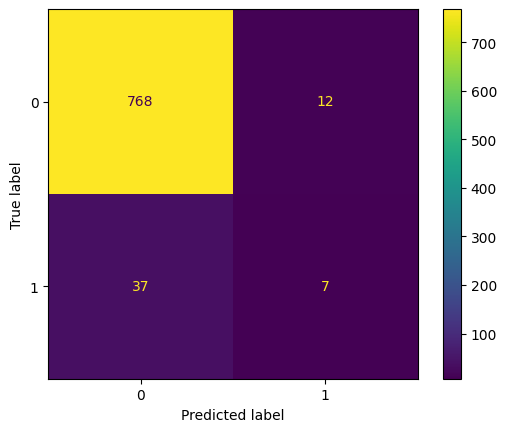

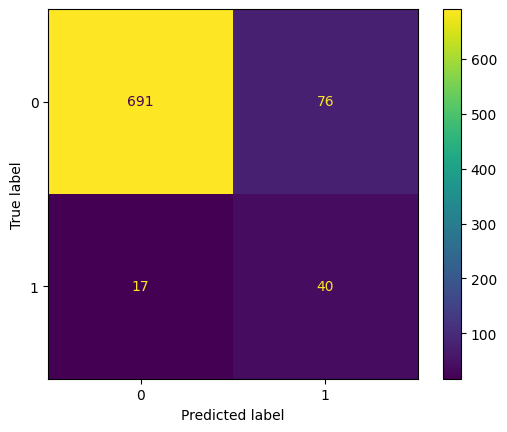

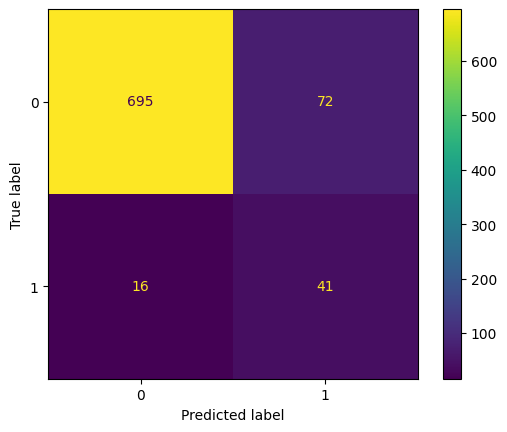

In [20]:
_, _, _, LDA_final, SVCClf, X_test= train_participant("VPdx.mat", 1000)

In [20]:
%reset_selective -f "^len$"

In [60]:
import time
import random

start = time.time()
rndIndex = random.randint(0, len(X_test) - 1)

sampleInput = X_test[rndIndex].reshape(1,-1)
LDA_final.predict(sampleInput)
end = time.time()
print('Time taken: ', end-start)

Time taken:  0.0


In [61]:
import time
import random

start = time.time()
randomIndex = random.randint(0, len(X_test) - 1)

sampleInput = X_test[randomIndex].reshape(1,-1)
SVCClf.predict(sampleInput)
end = time.time()
print('Time taken: ', end-start)

Time taken:  0.0009889602661132812


LDA Accuracy : 0.6131953428201811
LDA AUC Score : 0.894716494845361
LDA F1 Score : 0.37578288100208773
RLDA Accuracy : 0.8272962483829237
RLDA AUC Score : 0.894716494845361
RLDA F1 Score : 0.8334373050530256


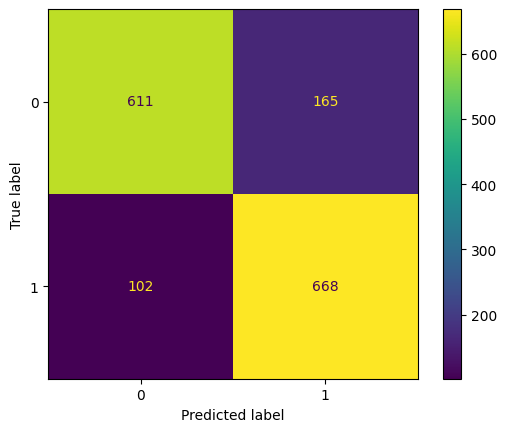

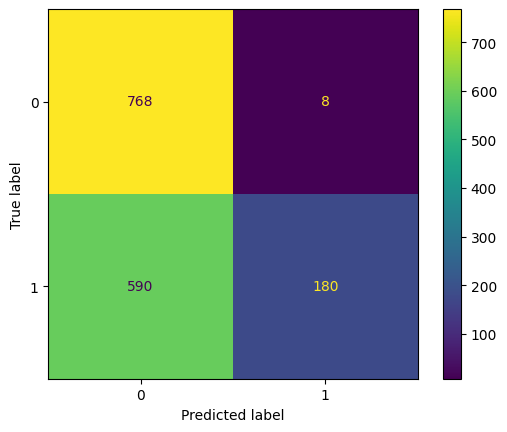

In [38]:
TR = epochs["car_brake"].get_data() #.copy()
TR = np.swapaxes(TR, 1, 2)
# TR = TR[0:,0:len+1,0:]
TR = np.swapaxes(TR, 0, 1)
# print(TR.shape)
TR = np.mean(TR, axis=2)
TR = np.swapaxes(TR, 0, 1)

FL = epochs["car_normal"].get_data() #.copy()
# FL = epochs['car_normal'].get_data()
FL = np.swapaxes(FL, 1, 2)
# FL = FL[0:,0:len+1,0:]
FL = np.swapaxes(FL, 0, 1)
FL = np.mean(FL, axis=2)
FL = np.swapaxes(FL, 0, 1)

# plt.figure(len)
# plt.plot(np.mean(TR, axis=0))    
# plt.plot(np.mean(FL, axis=0))   
# plt.legend(["TR", "FL"]) 
# plt.plot(np.mean(TR, axis=1))
# plt.plot(np.mean(FL, axis=1))

# TR = sc.fit_transform(TR)
# FL = sc.fit_transform(FL)

TrueLabels = [1 for sample in range(TR.shape[0])]
FalseLabels = [0 for sample in range(FL.shape[0])]

X = np.concatenate((TR, FL))
y = np.concatenate((TrueLabels, FalseLabels))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

lda = LDA(n_components=1)
lda.fit(X_train, y_train)


# print("Before SMOTE")
# print('True Positive :', tp1)
# print('True Negative :', tn1)
# print('False Positive :', fp1)
# print('False Negative :', fn1)
# print("Precision score",np.round(precision_score(y_test, y_pred),3))






cm1 = confusion_matrix(y_test, y_pred)
acc1 = accuracy_score(y_test, y_pred)
y_pred_proba = lda.predict_proba(X_test)[:, 1]
auc_score1 = roc_auc_score(y_test, y_pred_proba)
f11 = f1_score(y_test, y_pred)



# print('Accuracy :', acc1)
# print('AUC Score :', auc_score1)

# print('F1 Score :', f11)


# lda_1 = DiscriminentAnalysis()
# lda_1.fit(X,y)

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Xs_train, ys_train = oversample.fit_resample(Xs_train, ys_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid = dict()
grid['solver'] = ['eigen','lsqr']
grid['shrinkage'] = ['auto',0.2,1,0.3,0.5]
search = GridSearchCV(LDA(), grid, scoring='precision', cv=cv, n_jobs=8)
results = search.fit(Xs_train, ys_train)

# print('Precision: %.3f' % results.best_score_)
# print('Configuration:',results.best_params_)

# y2_pred = search.predict(ys_test)
# cm2 = confusion_matrix(ys_test, y2_pred)
# acc2 = accuracy_score(ys_test, y2_pred)
# y2_pred_proba = lda.predict_proba(Xs_test)[:, 1]
# auc_score2 = roc_auc_score(ys_test, y2_pred_proba)
# f12 = f1_score(ys_test, y2_pred)

# print('Accuracy :', acc)
# print('AUC Score :', auc_score)
# print('F1 Score :', f1)


LDA_final=LDA(shrinkage='auto', solver='eigen')
# LDA_final.fit_transform(Xs_train,ys_train)
LDA_final.fit(Xs_train,ys_train)
ys_pred = LDA_final.predict(Xs_test)

# print(X.shape)
# print(X_smote.shape)
ConfusionMatrixDisplay.from_predictions(ys_test, ys_pred)


y_pred = lda.predict(Xs_test)
# tn1, fp1, fn1, tp1 = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
ConfusionMatrixDisplay.from_predictions(ys_test, y_pred)
# tn, fp, fn, tp = confusion_matrix(list(ys_test), list(ys_pred), labels=[0, 1]).ravel()
# print("After SMOTE")
# print('True Positive :', tp)
# print('True Negative :', tn)
# print('False Positive :', fp)
# print('False Negative :', fn)
# print("Precision score",np.round(precision_score(ys_test, ys_pred),3))
cm = confusion_matrix(ys_test, y_pred)
acc = accuracy_score(ys_test, y_pred)
y_pred_proba = lda.predict_proba(Xs_test)[:, 1]
auc_score = roc_auc_score(ys_test, y_pred_proba)
f1 = f1_score(ys_test, y_pred)

print('LDA Accuracy :', acc)
print('LDA AUC Score :', auc_score)
print('LDA F1 Score :', f1)

cm = confusion_matrix(ys_test, ys_pred)
acc = accuracy_score(ys_test, ys_pred)
ys_pred_proba = lda.predict_proba(Xs_test)[:, 1]
auc_score = roc_auc_score(ys_test, ys_pred_proba)
f1 = f1_score(ys_test, ys_pred)

print('RLDA Accuracy :', acc)
print('RLDA AUC Score :', auc_score)
print('RLDA F1 Score :', f1)


In [33]:
train_participant("VPbad.mat", 40)

Creating RawArray with float64 data, n_channels=59, n_times=1619951
    Range : 0 ... 1619950 =      0.000 ...  8099.750 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58], dtype=int64),)


  0%|          | 0/7 [00:00<?, ?it/s]

Time  -200
LDA Accuracy : 0.8386308068459658
LDA AUC Score : 0.8755387364658888
LDA F1 Score : 0.2826086956521739
Entered SVM:


 14%|█▍        | 1/7 [01:01<06:07, 61.25s/it]

SVM Accuracy : 0.8386308068459658
SVM AUC Score : 0.5854304635761589
SVM F1 Score : 0.3023255813953489
Time  0
LDA Accuracy : 0.8508557457212714
LDA AUC Score : 0.8424051298223483
LDA F1 Score : 0.2650602409638554
Entered SVM:


 29%|██▊       | 2/7 [01:49<04:28, 53.76s/it]

SVM Accuracy : 0.8508557457212714
SVM AUC Score : 0.4785451487438242
SVM F1 Score : 0.31645569620253167
Time  200
LDA Accuracy : 0.8557457212713936
LDA AUC Score : 0.8403868390623357
LDA F1 Score : 0.2891566265060241
Entered SVM:


 43%|████▎     | 3/7 [02:43<03:35, 53.93s/it]

SVM Accuracy : 0.8557457212713936
SVM AUC Score : 0.5891937348890991
SVM F1 Score : 0.2824858757062147
Time  400
LDA Accuracy : 0.9009779951100244
LDA AUC Score : 0.8593293387995374
LDA F1 Score : 0.4489795918367347
Entered SVM:


 57%|█████▋    | 4/7 [03:11<02:11, 43.67s/it]

SVM Accuracy : 0.9009779951100244
SVM AUC Score : 0.4573320719016083
SVM F1 Score : 0.4305555555555555
Time  600
LDA Accuracy : 0.9266503667481663
LDA AUC Score : 0.9103332282140228
LDA F1 Score : 0.5161290322580645
Entered SVM:


 71%|███████▏  | 5/7 [03:32<01:10, 35.25s/it]

SVM Accuracy : 0.9266503667481663
SVM AUC Score : 0.464375065699569
SVM F1 Score : 0.5
Time  800
LDA Accuracy : 0.9266503667481663
LDA AUC Score : 0.91947860822033
LDA F1 Score : 0.5384615384615385
Entered SVM:


 86%|████████▌ | 6/7 [03:50<00:29, 29.56s/it]

SVM Accuracy : 0.9266503667481663
SVM AUC Score : 0.44694628403237674
SVM F1 Score : 0.559322033898305
Time  1000
LDA Accuracy : 0.921760391198044
LDA AUC Score : 0.9019026595185536
LDA F1 Score : 0.5362318840579711
Entered SVM:


100%|██████████| 7/7 [04:10<00:00, 35.79s/it]

SVM Accuracy : 0.921760391198044
SVM AUC Score : 0.4906969410280668
SVM F1 Score : 0.512


([0.8755387364658888,
  0.8424051298223483,
  0.8403868390623357,
  0.8593293387995374,
  0.9103332282140228,
  0.91947860822033,
  0.9019026595185536],
 [0.8386308068459658,
  0.8508557457212714,
  0.8557457212713936,
  0.9009779951100244,
  0.9266503667481663,
  0.9266503667481663,
  0.921760391198044],
 [0.2826086956521739,
  0.2650602409638554,
  0.2891566265060241,
  0.4489795918367347,
  0.5161290322580645,
  0.5384615384615385,
  0.5362318840579711])

In [ ]:
plt.plot(SVMAU)

In [24]:
import pandas as pd
import numpy as np
import csv

def export_data_csv(dir, name, len):
    vpae_dict = mat73.loadmat(dir)
    raw_eeg, epoch = load_MATLAB_data(participant_data=vpae_dict)


    non_targets = []
    data_pairs = list(zip(vpae_dict['mrk']['time'], vpae_dict['mrk']['time'][1:]))
    data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]
    # npTarget = np.delete(npTarget, npFiltered, 1)
    for pr in data_pairs:
        counter = pr[0] + 600
        while (counter < pr[1]-900):
            non_targets.append(vpae_dict['cnt']['x'][counter:counter+301])
            counter += 301

    # data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time'])-1)]
    # for vpae_dict in mat_dicts:
    npFiltered = np.where(np.std(epoch['car_normal'].average().get_data(), axis=1) > 2)
    print(npFiltered)

    npNonTarget = np.array(non_targets)
    npNonTarget = np.swapaxes(npNonTarget, 1,2)
    npNonTarget = np.delete(npNonTarget, 0, 1)
    npNonTarget = np.delete(npNonTarget, 4, 1)
    npNonTarget = np.delete(npNonTarget, np.s_[59:], 1)
    # npNonTarget = np.delete(npNonTarget, npFiltered, 1)

    # npNonTarget = mne.baseline.rescale(npNonTarget, )

    # st = 40

    indices = list(np.where(vpae_dict['mrk']['y'][1] == 1.0)[0])
    times = [vpae_dict['mrk']['time'][x] for x in indices]



    # targets = []
    # for i in range(vpae_dict['mrk']['time'].shape[0]):
    #     if (vpae_dict['mrk']['y'][1][i]):
    #         t = int(vpae_dict['mrk']['time'][i]/5)
    #         targets.append(vpae_dict['cnt']['x'][t+len-300:t+len+1])

    # stim_slices = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]
    targets = np.array([vpae_dict['cnt']['x'][int(idx/5)+len-1:int(idx/5)+len+300] for idx in times])
    # targets = [vpae_dict['cnt']['x'][int(idx/5)+len:int(idx/5)+len+1] for idx in times]


    npTarget = np.array(targets)
    npTarget = np.swapaxes(npTarget, 1,2)
    npTarget = np.delete(npTarget, 0, 1)
    npTarget = np.delete(npTarget, 4, 1)
    npTarget = np.delete(npTarget, np.s_[59:], 1)
    # npTarget = np.delete(npTarget,npFiltered, 1)


    TR = npTarget #.copy()
    TR = np.swapaxes(TR, 1, 2)
    # TR = TR[0:,0:len+1,0:]
    TR = np.swapaxes(TR, 0, 1)
    # print(TR.shape)
    TR = np.mean(TR, axis=2)
    TR = np.swapaxes(TR, 0, 1)

    FL = npNonTarget #.copy()
    # FL = epochs['car_normal'].get_data()
    FL = np.swapaxes(FL, 1, 2)
    # FL = FL[0:,0:len+1,0:]
    FL = np.swapaxes(FL, 0, 1)
    FL = np.mean(FL, axis=2)
    FL = np.swapaxes(FL, 0, 1)

    TrueLabels = [1 for sample in range(TR.shape[0])]
    FalseLabels = [0 for sample in range(FL.shape[0])]

    X = np.concatenate((TR, FL))
    y = np.concatenate((TrueLabels, FalseLabels))
    y = np.expand_dims(y, axis=1)

    Xyconcat = np.concatenate((X,y), axis=1)

    with open(name+'.csv', 'w') as file:
        csvwriter = csv.writer(file)
        headers = ['t_'+str(i) for i in range(-1700+5*len,-200+5*len+1, 5)]
        headers.append('label')
        csvwriter.writerow(headers)
        csvwriter.writerows(Xyconcat)


    print(np.concatenate((npNonTarget, npTarget), axis=0).shape)
    print(y.shape)
    with open(name+'X_raw.npy', 'w') as file:
        np.save(name+'X_raw.npy', np.concatenate((npNonTarget, npTarget), axis=0))

    with open(name+'y_raw.npy', 'w') as file:
        np.save(name+'y_raw.npy',y)
        # np.save(file, np.concatenate((npNonTarget, npTarget), axis=0))
    #     csvwriter = csv.writer(file)
    #     headers = ['t_'+str(i) for i in range(-1700+5*len,-200+5*len+1, 5)]
    #     headers.append('label')
    #     csvwriter.writerow(headers)
    #     csvwriter.writerows(Xyconcat)

    # return Xyconcat


In [25]:

export_data_csv("VPdx.mat", "VPdx_0", 0)
export_data_csv("VPae.mat", "VPdx_1500", 240)

Creating RawArray with float64 data, n_channels=59, n_times=1619949
    Range : 0 ... 1619948 =      0.000 ...  8099.740 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1669 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1669 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 21, 22, 23, 24, 28, 29, 30, 31, 33, 37, 38, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)
(4119, 59, 301)
(4119, 1)
Creating RawArray with float64 data, n_channels=59, n_times=1619949
    Range : 0 ... 1619948 =      0.000 ...  8099.740 secs
Ready.
Multiple event values for single e

In [12]:
import os
from tqdm import tqdm

mat_files = []


files_dir = ".\\"
AUC_Matrix = []
Acc_Matrix = []
F1_Matrix = []

for filename in tqdm(os.listdir(files_dir)):
    f = os.path.join(files_dir, filename)
    if os.path.isfile(f) and f[-3:] == "mat":
        mat_files.append(f)

for file in tqdm(mat_files):
    try:
        AUC, acc, F1 = train_participant(file, 40)
    except:
        print("An exception occurred")
    AUC_Matrix.append(AUC)
    Acc_Matrix.append(acc)
    F1_Matrix.append(F1)


  0%|          | 0/18 [00:00<?, ?it/s]

Creating RawArray with float64 data, n_channels=59, n_times=1619936
    Range : 0 ... 1619935 =      0.000 ...  8099.675 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5, 11, 12, 13, 20, 21, 22, 30, 33, 40, 50, 57,
       58], dtype=int64),)


Time  -200


Accuracy : 0.6211562115621156
AUC Score : 0.6266268631072549
F1 Score : 0.12994350282485875
Time  0


Accuracy : 0.6445264452644527
AUC Score : 0.6397921051501224
F1 Score : 0.1268882175226586
Time  200


Accuracy : 0.6150061500615006
AUC Score : 0.6490700571281304
F1 Score : 0.0927536231884058
Time  400


Accuracy : 0.6199261992619927
AUC Score : 0.7015162578927021
F1 Score : 0.10951008645533142
Time  600


Accuracy : 0.7146371463714637
AUC Score : 0.6765388084704266
F1 Score : 0.14074074074074075
Time  800


Accuracy : 0.6900369003690037
AUC Score : 0.6934839568747048
F1 Score : 0.16556291390728478
Time  1000


  6%|▌         | 1/18 [00:57<16:17, 57.51s/it]

Accuracy : 0.6752767527675276
AUC Score : 0.6931188522829775
F1 Score : 0.14285714285714288
Creating RawArray with float64 data, n_channels=59, n_times=1619951
    Range : 0 ... 1619950 =      0.000 ...  8099.750 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.8447432762836186
AUC Score : 0.8755387364658888
F1 Score : 0.2983425414364641
Time  0


Accuracy : 0.8569682151589242
AUC Score : 0.8424051298223483
F1 Score : 0.29090909090909084
Time  200


Accuracy : 0.8557457212713936
AUC Score : 0.8403868390623357
F1 Score : 0.2891566265060241
Time  400


Accuracy : 0.9009779951100244
AUC Score : 0.8593293387995374
F1 Score : 0.43356643356643354
Time  600


Accuracy : 0.9242053789731052
AUC Score : 0.9103332282140228
F1 Score : 0.515625
Time  800


Accuracy : 0.9229828850855746
AUC Score : 0.91947860822033
F1 Score : 0.5116279069767442
Time  1000


 11%|█         | 2/18 [01:54<15:14, 57.15s/it]

Accuracy : 0.9193154034229829
AUC Score : 0.9019026595185536
F1 Score : 0.5352112676056338
Creating RawArray with float64 data, n_channels=59, n_times=1619954
    Range : 0 ... 1619953 =      0.000 ...  8099.765 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
988 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 988 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.6986301369863014
AUC Score : 0.8149130381152091
F1 Score : 0.14788732394366197
Time  0


Accuracy : 0.6998754669987547
AUC Score : 0.7650178857777229
F1 Score : 0.14840989399293286
Time  200


Accuracy : 0.7023661270236613
AUC Score : 0.7618930142675056
F1 Score : 0.14336917562724014
Time  400


Accuracy : 0.7310087173100872
AUC Score : 0.791250359771391
F1 Score : 0.23404255319148937
Time  600


Accuracy : 0.7833125778331258
AUC Score : 0.812569384482546
F1 Score : 0.2809917355371901
Time  800


Accuracy : 0.7496886674968867
AUC Score : 0.780087167468443
F1 Score : 0.24150943396226415
Time  1000


 17%|█▋        | 3/18 [02:49<14:00, 56.04s/it]

Accuracy : 0.7646326276463262
AUC Score : 0.8139467949508655
F1 Score : 0.24701195219123506
Creating RawArray with float64 data, n_channels=59, n_times=1619938
    Range : 0 ... 1619937 =      0.000 ...  8099.685 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
702 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 702 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\G

An exception occurred
Creating RawArray with float64 data, n_channels=59, n_times=1619949
    Range : 0 ... 1619948 =      0.000 ...  8099.740 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1669 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1669 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 21, 22, 23, 24, 28, 29, 30, 31, 33, 37, 38, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.7997572815533981
AUC Score : 0.7481415402914066
F1 Score : 0.21800947867298578
Time  0


Accuracy : 0.7657766990291263
AUC Score : 0.7672636611084426
F1 Score : 0.1572052401746725
Time  200


Accuracy : 0.7682038834951457
AUC Score : 0.7584345479082321
F1 Score : 0.1278538812785388
Time  400


Accuracy : 0.8531553398058253
AUC Score : 0.8396349413298565
F1 Score : 0.3664921465968586
Time  600


Accuracy : 0.9114077669902912
AUC Score : 0.864109426107642
F1 Score : 0.48226950354609927
Time  800


Accuracy : 0.8968446601941747
AUC Score : 0.8412360758480296
F1 Score : 0.46540880503144655
Time  1000


 28%|██▊       | 5/18 [03:47<09:09, 42.27s/it]

Accuracy : 0.8992718446601942
AUC Score : 0.8529701045312107
F1 Score : 0.4844720496894411
Creating RawArray with float64 data, n_channels=59, n_times=1619934
    Range : 0 ... 1619933 =      0.000 ...  8099.665 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1439 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1439 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 18, 19,
       20, 21, 22, 23, 28, 29, 30, 31, 36, 37, 38, 39, 40, 41, 42, 43, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.7546933667083855
AUC Score : 0.8049702244617498
F1 Score : 0.15517241379310345
Time  0


Accuracy : 0.7847309136420526
AUC Score : 0.8240265689418232
F1 Score : 0.23893805309734517
Time  200


Accuracy : 0.7672090112640801
AUC Score : 0.8091158955565736
F1 Score : 0.211864406779661
Time  400


Accuracy : 0.8911138923654568
AUC Score : 0.8563902885936785
F1 Score : 0.4
Time  600


Accuracy : 0.899874843554443
AUC Score : 0.8813559322033898
F1 Score : 0.42028985507246386
Time  800


Accuracy : 0.9236545682102628
AUC Score : 0.8740265689418232
F1 Score : 0.5120000000000001
Time  1000


 33%|███▎      | 6/18 [04:38<09:01, 45.13s/it]

Accuracy : 0.9261576971214017
AUC Score : 0.9034585432890518
F1 Score : 0.556390977443609
Creating RawArray with float64 data, n_channels=59, n_times=1619964
    Range : 0 ... 1619963 =      0.000 ...  8099.815 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
959 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 959 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.7356608478802993
AUC Score : 0.7822024614988077
F1 Score : 0.1653543307086614
Time  0


Accuracy : 0.773067331670823
AUC Score : 0.7806559701011663
F1 Score : 0.2222222222222222
Time  200


Accuracy : 0.8391521197007481
AUC Score : 0.8821874261657753
F1 Score : 0.3451776649746193
Time  400


Accuracy : 0.972568578553616
AUC Score : 0.9661490216294004
F1 Score : 0.8253968253968254
Time  600


Accuracy : 0.9588528678304239
AUC Score : 0.9670081835169791
F1 Score : 0.7518796992481204
Time  800


Accuracy : 0.9688279301745636
AUC Score : 0.9833966965225422
F1 Score : 0.8091603053435115
Time  1000


 39%|███▉      | 7/18 [05:29<08:37, 47.01s/it]

Accuracy : 0.9576059850374065
AUC Score : 0.9770818566488392
F1 Score : 0.7500000000000001
Creating RawArray with float64 data, n_channels=59, n_times=1619664
    Range : 0 ... 1619663 =      0.000 ...  8098.315 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
959 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 959 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.6168108776266996
AUC Score : 0.7313758389261744
F1 Score : 0.14364640883977903
Time  0


Accuracy : 0.6044499381953028
AUC Score : 0.7490981543624161
F1 Score : 0.10614525139664806
Time  200


Accuracy : 0.6291718170580964
AUC Score : 0.7402055369127516
F1 Score : 0.13294797687861273
Time  400


Accuracy : 0.6934487021013597
AUC Score : 0.8146392617449664
F1 Score : 0.2298136645962733
Time  600


Accuracy : 0.796044499381953
AUC Score : 0.8707843959731544
F1 Score : 0.32653061224489793
Time  800


Accuracy : 0.8318912237330037
AUC Score : 0.8374580536912752
F1 Score : 0.40869565217391307
Time  1000


 44%|████▍     | 8/18 [06:21<08:06, 48.62s/it]

Accuracy : 0.8355995055624228
AUC Score : 0.8534815436241611
F1 Score : 0.4088888888888889
Creating RawArray with float64 data, n_channels=59, n_times=1619688
    Range : 0 ... 1619687 =      0.000 ...  8098.435 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
973 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 973 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.6257744733581165
AUC Score : 0.6580164872139973
F1 Score : 0.1564245810055866
Time  0


Accuracy : 0.6294919454770755
AUC Score : 0.6773006393001346
F1 Score : 0.13333333333333333
Time  200


Accuracy : 0.6468401486988847
AUC Score : 0.6700243943472409
F1 Score : 0.1543026706231454
Time  400


Accuracy : 0.7224287484510533
AUC Score : 0.7037769179004038
F1 Score : 0.24324324324324326
Time  600


Accuracy : 0.7521685254027262
AUC Score : 0.711221399730821
F1 Score : 0.24242424242424243
Time  800


Accuracy : 0.7509293680297398
AUC Score : 0.7219885598923284
F1 Score : 0.2795698924731183
Time  1000


 50%|█████     | 9/18 [07:13<07:26, 49.61s/it]

Accuracy : 0.7657992565055762
AUC Score : 0.7067631224764468
F1 Score : 0.29739776951672864
Creating RawArray with float64 data, n_channels=59, n_times=1619680
    Range : 0 ... 1619679 =      0.000 ...  8098.395 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1011 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1011 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58], dtype=int64),)


Time  -200


Accuracy : 0.7093167701863354
AUC Score : 0.7341804646386857
F1 Score : 0.1702127659574468
Time  0


Accuracy : 0.715527950310559
AUC Score : 0.7097077824840629
F1 Score : 0.15498154981549814
Time  200


Accuracy : 0.7142857142857143
AUC Score : 0.7239335985966714
F1 Score : 0.12213740458015267
Time  400


Accuracy : 0.8074534161490683
AUC Score : 0.7974158216745819
F1 Score : 0.27906976744186046
Time  600


Accuracy : 0.8322981366459627
AUC Score : 0.8251829033500193
F1 Score : 0.321608040201005
Time  800


Accuracy : 0.8633540372670807
AUC Score : 0.8865785307833824
F1 Score : 0.3888888888888889
Time  1000


 56%|█████▌    | 10/18 [08:05<06:42, 50.35s/it]

Accuracy : 0.884472049689441
AUC Score : 0.8671330167287041
F1 Score : 0.4294478527607362
Creating RawArray with float64 data, n_channels=59, n_times=1619680
    Range : 0 ... 1619679 =      0.000 ...  8098.395 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
837 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 837 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6, 13, 14, 22, 23, 24, 33, 34, 41, 42, 53],
      dtype=int64),)


Time  -200


Accuracy : 0.7327790973871734
AUC Score : 0.7726044431690461
F1 Score : 0.13127413127413126
Time  0


Accuracy : 0.7351543942992874
AUC Score : 0.8413324724394385
F1 Score : 0.15849056603773584
Time  200


Accuracy : 0.7541567695961995
AUC Score : 0.8423368486500705
F1 Score : 0.18181818181818182
Time  400


Accuracy : 0.8135391923990499
AUC Score : 0.8365019011406845
F1 Score : 0.22660098522167485
Time  600


Accuracy : 0.8847980997624703
AUC Score : 0.8893033933567688
F1 Score : 0.4191616766467066
Time  800


Accuracy : 0.9097387173396675
AUC Score : 0.9148671592892842
F1 Score : 0.49333333333333323
Time  1000


 61%|██████    | 11/18 [09:00<06:02, 51.72s/it]

Accuracy : 0.9038004750593824
AUC Score : 0.9237630628691681
F1 Score : 0.4774193548387097
Creating RawArray with float64 data, n_channels=59, n_times=1620050
    Range : 0 ... 1620049 =      0.000 ...  8100.245 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
938 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 938 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 26, 27, 28, 29, 30, 35, 36, 37, 38, 39, 46, 47,
       48, 49, 53, 54, 55, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.6795994993742178
AUC Score : 0.744991300024857
F1 Score : 0.1292517006802721
Time  0


Accuracy : 0.723404255319149
AUC Score : 0.6943574446930151
F1 Score : 0.14007782101167315
Time  200


Accuracy : 0.7221526908635795
AUC Score : 0.6847874720357942
F1 Score : 0.12598425196850394
Time  400


Accuracy : 0.7909887359198998
AUC Score : 0.8018891374596071
F1 Score : 0.27705627705627706
Time  600


Accuracy : 0.8035043804755945
AUC Score : 0.8188416604523987
F1 Score : 0.30837004405286345
Time  800


Accuracy : 0.8272841051314143
AUC Score : 0.8156599552572708
F1 Score : 0.3235294117647059
Time  1000


 67%|██████▋   | 12/18 [09:57<05:20, 53.36s/it]

Accuracy : 0.8260325406758448
AUC Score : 0.8274919214516531
F1 Score : 0.3349282296650718
Creating RawArray with float64 data, n_channels=59, n_times=1619928
    Range : 0 ... 1619927 =      0.000 ...  8099.635 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
934 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 934 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


Accuracy : 0.6373626373626373
AUC Score : 0.7374021367706215
F1 Score : 0.11343283582089554
Time  0


Accuracy : 0.6507936507936508
AUC Score : 0.7149746961373761
F1 Score : 0.13855421686746988
Time  200


Accuracy : 0.6227106227106227
AUC Score : 0.7169211471084389
F1 Score : 0.1295774647887324
Time  400


Accuracy : 0.7118437118437119
AUC Score : 0.7823651542021715
F1 Score : 0.2435897435897436
Time  600


Accuracy : 0.7826617826617827
AUC Score : 0.8144383407586834
F1 Score : 0.29365079365079366
Time  800


Accuracy : 0.78998778998779
AUC Score : 0.8093343137678966
F1 Score : 0.2892561983471074
Time  1000


 72%|███████▏  | 13/18 [10:52<04:28, 53.79s/it]

Accuracy : 0.7887667887667887
AUC Score : 0.847095462606514
F1 Score : 0.3162055335968379


 78%|███████▊  | 14/18 [10:55<02:34, 38.55s/it]

An exception occurred
Creating RawArray with float64 data, n_channels=59, n_times=1619967
    Range : 0 ... 1619966 =      0.000 ...  8099.830 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
950 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 950 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  4, 12, 13, 30, 31, 40, 51, 56], dtype=int64),)


Time  -200


Accuracy : 0.6707920792079208
AUC Score : 0.7316868279569894
F1 Score : 0.20359281437125745
Time  0


Accuracy : 0.7091584158415841
AUC Score : 0.7420404905913978
F1 Score : 0.19795221843003413
Time  200


Accuracy : 0.7103960396039604
AUC Score : 0.7518901209677419
F1 Score : 0.1818181818181818
Time  400


Accuracy : 0.8292079207920792
AUC Score : 0.8162802419354839
F1 Score : 0.3669724770642202
Time  600


Accuracy : 0.8675742574257426
AUC Score : 0.8493363575268817
F1 Score : 0.3885714285714285
Time  800


Accuracy : 0.8650990099009901
AUC Score : 0.8699596774193548
F1 Score : 0.4293193717277487
Time  1000


 83%|████████▎ | 15/18 [11:50<02:10, 43.42s/it]

Accuracy : 0.8725247524752475
AUC Score : 0.8807753696236558
F1 Score : 0.430939226519337
Creating RawArray with float64 data, n_channels=59, n_times=1619951
    Range : 0 ... 1619950 =      0.000 ...  8099.750 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
946 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 946 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  5, 11, 12, 21, 30, 40, 49, 50, 55], dtype=int64),)


Time  -200


Accuracy : 0.6748768472906403
AUC Score : 0.7846549131016043
F1 Score : 0.175
Time  0


Accuracy : 0.6859605911330049
AUC Score : 0.7920914104278074
F1 Score : 0.19558359621451105
Time  200


Accuracy : 0.6711822660098522
AUC Score : 0.7895011697860962
F1 Score : 0.17337461300309598
Time  400


Accuracy : 0.8472906403940886
AUC Score : 0.8615892379679144
F1 Score : 0.4095238095238095
Time  600


Accuracy : 0.9174876847290641
AUC Score : 0.8711981951871657
F1 Score : 0.5786163522012578
Time  800


Accuracy : 0.8990147783251231
AUC Score : 0.8751671122994651
F1 Score : 0.5176470588235295
Time  1000


 89%|████████▉ | 16/18 [12:45<01:34, 47.15s/it]

Accuracy : 0.9125615763546798
AUC Score : 0.9126838235294119
F1 Score : 0.5847953216374269
Creating RawArray with float64 data, n_channels=59, n_times=1619940
    Range : 0 ... 1619939 =      0.000 ...  8099.695 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1141 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1141 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 14, 15, 17, 18, 19, 20,
       21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40,
       41, 42, 43, 45, 46, 47, 49, 50, 51, 53, 54, 55], dtype=int64),)


Time  -200


Accuracy : 0.7277167277167277
AUC Score : 0.711241286638112
F1 Score : 0.15849056603773584
Time  0


Accuracy : 0.7435897435897436
AUC Score : 0.682938607541782
F1 Score : 0.16
Time  200


Accuracy : 0.7301587301587301
AUC Score : 0.7513857394809776
F1 Score : 0.18450184501845018
Time  400


Accuracy : 0.8449328449328449
AUC Score : 0.869530528260687
F1 Score : 0.3981042654028436
Time  600


Accuracy : 0.8656898656898657
AUC Score : 0.8467708070882675
F1 Score : 0.44999999999999996
Time  800


Accuracy : 0.8669108669108669
AUC Score : 0.8431384899638869
F1 Score : 0.44670050761421315
Time  1000


 94%|█████████▍| 17/18 [13:40<00:49, 49.39s/it]

Accuracy : 0.9120879120879121
AUC Score : 0.89161837574536
F1 Score : 0.5714285714285714
Creating RawArray with float64 data, n_channels=59, n_times=1619938
    Range : 0 ... 1619937 =      0.000 ...  8099.685 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
974 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 974 events and 301 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58], dtype=int64),)


Time  -200


c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\G7\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\G

An exception occurred


In [160]:
for i in range(-10, 10):
    try:
        print("x = ", 1/i)
    except:
        print("Exception!!")

x =  -0.1
x =  -0.1111111111111111
x =  -0.125
x =  -0.14285714285714285
x =  -0.16666666666666666
x =  -0.2
x =  -0.25
x =  -0.3333333333333333
x =  -0.5
x =  -1.0
Exception!!
x =  1.0
x =  0.5
x =  0.3333333333333333
x =  0.25
x =  0.2
x =  0.16666666666666666
x =  0.14285714285714285
x =  0.125
x =  0.1111111111111111


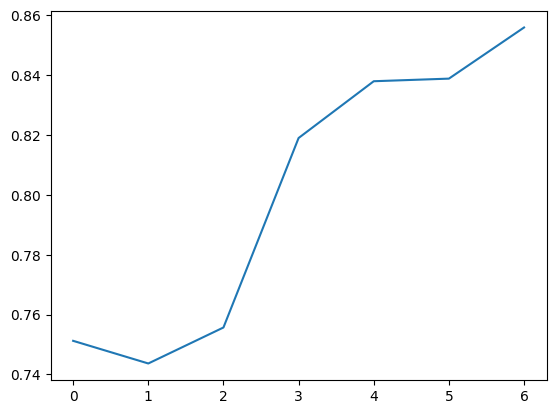

In [14]:
plt.plot(np.mean(AUC_Matrix, axis=0)) 
# print((AUC_Matrix[0]))

In [118]:
"""
Linear, Quadratic and Regularized discriminant analysis.
Regularized discriminant analysis is a compromise between
linear discrimenent analysis and quadratic discrimenent analysis.

If you wish to add the constraint that the covariance matrix be
diagonal (independent features), use Naive Bayes instead.
"""

import numpy as np


class DiscriminentAnalysis():
    """
    Class for implimenting Regularized Discriminent Analysis
    LDA is performed when alpha=0
    QDA is performed when alpha=1
    """
    def __init__(self, alpha=1.0):
        """
        Args:
            alpha (float): degree of regularization, in range(0, 1)

        Attributes:
            learned (bool): Keeps track of if RDA has been fit
            alpha (float): regularization parameter in range [0, 1]
                When alpha == 0, LDA is performed,
                When alpha == 1, QDA is performed.
                Intermediate values of alpha tradeoff pooled covarainces of LDA
                with seperate covariances of QDA, (regularized discriminant
                analysis).
            class_names (np.ndarray): array of class names. [0, 1] for example.
            class_priors (dict): prior probability of each class.
                determined via fraction of training samples in each class
            class_means (dict): vector means of each class
            regularized_covariances (np.ndarray): RDA covariances.
                weighted combination of QDA class covariance and
                LDA pooled covariance
        """
        self.learned = False
        self.alpha = alpha
        self.class_names = []
        self.class_priors = {}
        self.class_means = {}
        self.regularized_covariances = {}

    def fit(self, X, y):
        """
        Args:
            X (np.ndarray): Training data of shape[n_samples, n_features]
            y (np.ndarray): Target values of shape[n_samples, 1]

        Returns: an instance of self
        """
        self.class_names = np.unique(y)
        class_covariances = {}
        pooled_covariances = 0
        # Calculate class priors, class means, and LDA pooled covariance matrix
        for i in self.class_names:
            class_indices = np.where(y == i)[0]
            class_samples = X[class_indices, :]
            self.class_priors[i] = float(len(class_indices)) / len(y)
            self.class_means[i] = np.mean(class_samples, axis=0)
            class_covariances[i] = np.cov(class_samples, rowvar=0)
            # Add contribution of individual class covariance
            pooled_covariances += class_covariances[i] * self.class_priors[i]
        # Calculate RDA regularized covariance matricies for each class
        for i in self.class_names:
            self.regularized_covariances[i] = self.alpha * \
                class_covariances[i] + (1 - self.alpha) * pooled_covariances
        self.learned = True
        return self

    def predict(self, x):
        """
        Args:
            x (np.array): Training data of shape[1, n_features]
                Currently, only vector of single sample is supported

        Returns: predicted class of sample

        Raises:
            ValueError if model has not been fit
        """
        if not self.learned:
            raise NameError('Fit model first')
        # Determine probability of each class given input vector
        class_deltas = {}
        for i in self.class_names:
            # Divid the class delta calculation into 3 parts
            part1 = -0.5 * np.linalg.det(self.regularized_covariances[i])
            part2 = -0.5 * \
                np.dot(np.dot((x - self.class_means[i]).T,
                              np.linalg.pinv(self.regularized_covariances[i])),
                       (x - self.class_means[i]))
            part3 = np.log(self.class_priors[i])
            class_deltas[i] = part1 + part2 + part3
        return max(class_deltas, key=class_deltas.get)


In [119]:
lda_1 = DiscriminentAnalysis()

57   14
(230, 59, 301)
(227, 59, 301)


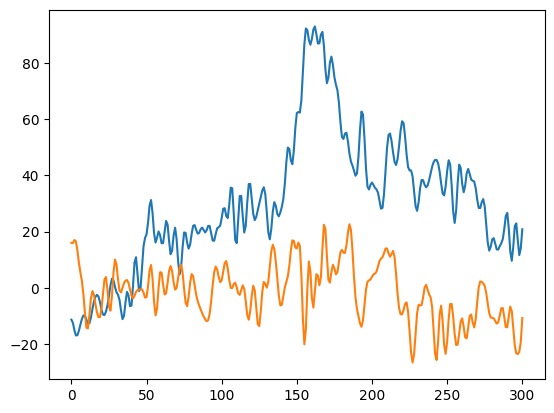

In [207]:
import random
x = random.randint(0,58)
y = random.randint(0,229)
z = random.randint(0,227)
print(x, " " , y)
plt.plot(epoch['car_normal'].get_data()[z][x])
plt.plot(epoch['car_brake'].get_data()[z][x])
print(epoch['car_normal'].get_data().shape)
print(epoch['car_brake'].get_data().shape)

In [194]:
len  = -40

targets = []
for i in range(vpae_dict['mrk']['time'].shape[0]):
    if (vpae_dict['mrk']['y'][1][i]):
        t = int(vpae_dict['mrk']['time'][i]/5)
        targets.append(vpae_dict['cnt']['x'][t-len:t+10])

npTarget = np.array(targets)
npTarget = np.swapaxes(npTarget, 1,2)
npTarget = np.delete(npTarget, 0, 1)
npTarget = np.delete(npTarget, 4, 1)
npTarget = np.delete(npTarget, np.s_[59:], 1)

print(npTarget.shape)
print(npNonTarget.shape)

(227, 59, 0)
(3837, 59, 301)


In [263]:


# mat_dicts = [mat73.loadmat(file) for file in tqdm(mat_files[0:5])]
# mat_epochs = [load_MATLAB_data(participant_data=mdict) for mdict in mat_dicts]

M = 1001
st = 50

search_AUC_scores = []
search_accuracies = []
search_cm_matrices = []
search_F1_scores = []

AUC_scores = []
accuracies = []
cm_matrices = []
F1_scores = []

AUC_scores3 = []
accuracies3 = []
cm_matrices3 = []
F1_scores3 = []

for len in tqdm(range(0, M, st)):
    print("Time ", len)
    # len = 200
    non_targets = []

    # data_pairs = [(vpae_dict['mrk']['time'][i], vpae_dict['mrk']['time'][i+1]) for i in range(len(vpae_dict['mrk']['time'])-1)]
    # for vpae_dict in mat_dicts:
    data_pairs = list(zip(vpae_dict['mrk']['time'], vpae_dict['mrk']['time'][1:]))
    data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]
    for pr in data_pairs:
        counter = pr[0] + 600
        while (counter < pr[1]-900):
            non_targets.append(vpae_dict['cnt']['x'][counter:counter+len+1])
            counter += len+1

    # TR = np.empty((0, 59,301))
    # for epoch in mat_epochs:
    #   TR = np.concatenate((TR, epoch['car_brake'].get_data()))

    # TR = epoch['car_brake'].get_data()

    # targets = []
    # for i in range(vpae_dict['mrk']['time'].shape[0]):
    #     if (vpae_dict['mrk']['y'][1][i]):
    #         t = int(vpae_dict['mrk']['time'][i]/5)
    #         targets.append(vpae_dict['cnt']['x'][t-len:t+10])

    # del mat_dicts
    # del mat_epochs
    # gc.collect()

    npNonTarget = np.array(non_targets)
    npNonTarget = np.swapaxes(npNonTarget, 1,2)
    npNonTarget = np.delete(npNonTarget, 0, 1)
    npNonTarget = np.delete(npNonTarget, 4, 1)
    npNonTarget = np.delete(npNonTarget, np.s_[59:], 1)
   
    npTarget = np.array(targets)
    npTarget = np.swapaxes(npTarget, 1,2)
    npTarget = np.delete(npTarget, 0, 1)
    npTarget = np.delete(npTarget, 4, 1)
    npTarget = np.delete(npTarget, np.s_[59:], 1)

    print(npTarget.shape)

    sc = StandardScaler()
    npNonTarget = sc.fit_transform(npNonTarget)
    npTarget = sc.transform(npTarget)

    TR = np.array(npTarget)
    TR = np.swapaxes(TR, 1, 2)
    TR = TR[0:,0:len+1,0:]

    TR = np.swapaxes(TR, 0, 1)
    TR = np.mean(TR, axis=2)
    TR = np.swapaxes(TR, 0, 1)

    FL = npNonTarget #.copy()
    # FL = epochs['car_normal'].get_data()
    FL = np.swapaxes(FL, 1, 2)
    # FL = FL[0:,0:len+1,0:]
    FL = np.swapaxes(FL, 0, 1)
    FL = np.mean(FL, axis=2)
    FL = np.swapaxes(FL, 0, 1)

    TrueLabels = [1 for sample in range(TR.shape[0])]
    FalseLabels = [0 for sample in range(FL.shape[0])]

    X = np.concatenate((TR, FL))
    y = np.concatenate((TrueLabels, FalseLabels))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # sc = StandardScaler()
    # X_train = sc.fit_transform(X_train)
    # X_test = sc.transform(X_test)

    lda = LDA(n_components=1)
    lda.fit(X_train, y_train)

    y_pred = lda.predict(X_test)
    tn1, fp1, fn1, tp1 = confusion_matrix(list(y_test), list(y_pred), labels=[0, 1]).ravel()
    # ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    # print("Before SMOTE")
    # print('True Positive :', tp1)
    # print('True Negative :', tn1)
    # print('False Positive :', fp1)
    # print('False Negative :', fn1)
    # print("Precision score",np.round(precision_score(y_test, y_pred),3))

    lda_try = DiscriminentAnalysis(alpha=0.5)
    lda_try.fit(X_train, y_train)
    y3_pred = lda_try.predict(X_test)

    cm3 = confusion_matrix(y_test, y3_pred)
    acc3 = accuracy_score(y_test, y3_pred)
    y3_pred_proba = lda.predict_proba(X_test)[:, 1]
    auc_score3 = roc_auc_score(y_test, y3_pred_proba)
    f13 = f1_score(y_test, y3_pred)

    AUC_scores3.append(auc_score3)
    F1_scores3.append(f13)
    cm_matrices3.append(cm3)
    accuracies3.append(acc3)



    cm1 = confusion_matrix(y_test, y_pred)
    acc1 = accuracy_score(y_test, y_pred)
    y_pred_proba = lda.predict_proba(X_test)[:, 1]
    auc_score1 = roc_auc_score(y_test, y_pred_proba)
    f11 = f1_score(y_test, y_pred)

    search_AUC_scores.append(auc_score1)
    search_F1_scores.append(f11)
    search_cm_matrices.append(cm1)
    search_accuracies.append(acc1)

    # print('Accuracy :', acc1)
    # print('AUC Score :', auc_score1)
    # print('F1 Score :', f11)


    oversample = SMOTE()
    X_smote, y_smote = oversample.fit_resample(X, y)
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    grid = dict()
    grid['solver'] = ['eigen','lsqr']
    grid['shrinkage'] = ['auto',0.2,1,0.3,0.5]
    search = GridSearchCV(LDA(), grid, scoring='precision', cv=cv, n_jobs=8)
    results = search.fit(Xs_train, ys_train)

    # print('Precision: %.3f' % results.best_score_)
    # print('Configuration:',results.best_params_)

    # y2_pred = search.predict(ys_test)
    # cm2 = confusion_matrix(ys_test, y2_pred)
    # acc2 = accuracy_score(ys_test, y2_pred)
    # y2_pred_proba = lda.predict_proba(Xs_test)[:, 1]
    # auc_score2 = roc_auc_score(ys_test, y2_pred_proba)
    # f12 = f1_score(ys_test, y2_pred)

    # print('Accuracy :', acc)
    # print('AUC Score :', auc_score)
    # print('F1 Score :', f1)


    LDA_final=LDA(shrinkage='auto', solver='eigen')
    LDA_final.fit_transform(Xs_train,ys_train)
    ys_pred = LDA_final.predict(Xs_test)

    # ConfusionMatrixDisplay.from_predictions(ys_test, ys_pred)
    
    # tn, fp, fn, tp = confusion_matrix(list(ys_test), list(ys_pred), labels=[0, 1]).ravel()
    # print("After SMOTE")
    # print('True Positive :', tp)
    # print('True Negative :', tn)
    # print('False Positive :', fp)
    # print('False Negative :', fn)
    # print("Precision score",np.round(precision_score(ys_test, ys_pred),3))






    cm = confusion_matrix(ys_test, ys_pred)
    acc = accuracy_score(ys_test, ys_pred)
    ys_pred_proba = lda.predict_proba(Xs_test)[:, 1]
    auc_score = roc_auc_score(ys_test, ys_pred_proba)
    f1 = f1_score(ys_test, ys_pred)

    # print('Accuracy :', acc)
    # print('AUC Score :', auc_score)
    # print('F1 Score :', f1)

    AUC_scores.append(auc_score)
    F1_scores.append(f1)
    cm_matrices.append(cm)
    accuracies.append(acc)



  0%|          | 0/21 [00:00<?, ?it/s]

Time  0


  0%|          | 0/21 [00:01<?, ?it/s]

(227, 59, 301)


ValueError: Found array with dim 3. StandardScaler expected <= 2.

(300,)


ValueError: 'x' and 'y' must have the same size

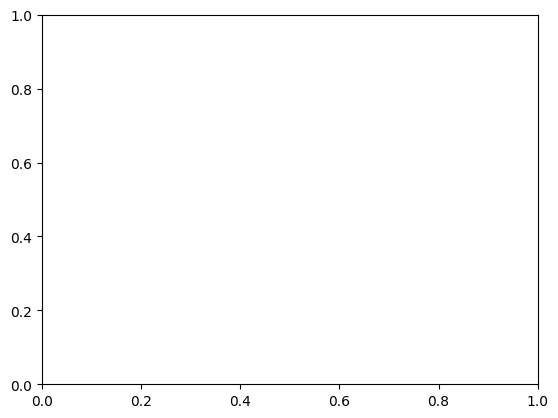

In [133]:
print(np.mean(TR,axis=0).shape)
xs = np.arange(301)
# plt.plot(np.mean(TR, axis=0))
plt.errorbar(xs, np.mean(TR, axis=0), np.std(TR, axis=0))
# plt.errorbar(xs, np.mean(FL, axis=0), np.std(FL, axis=0))
# plt.plot(np.mean(FL, axis=0))
# plt.plot(np.std(FL, axis=0))
plt.legend(["TR", "FL"])
print(FL.shape)

In [138]:
print(AUC_scores)


[0.8372000972314435, 0.9151425275096052, 0.9284282246917074, 0.9250512460499727, 0.9403633843798411]


In [139]:
print(F1_scores)

[0.7906336088154269, 0.8854189575544315, 0.890864636585908, 0.8865933078823265, 0.9007060900264784]


In [140]:
print(search_F1_scores)

[0.30508474576271183, 0.4516129032258065, 0.5070422535211268, 0.5, 0.49230769230769234]


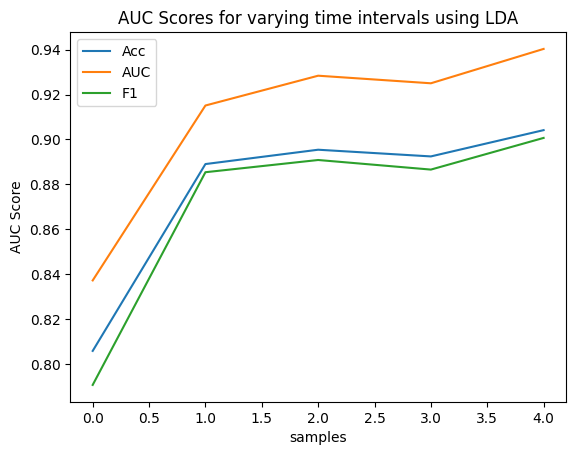

In [141]:
# y = np.arange(0, len(AUC_scores))
plt.title("AUC Scores for varying time intervals using LDA")
plt.xlabel("samples")
plt.ylabel("AUC Score")
# xs = np.arange(-300,1200, 20)
plt.plot( accuracies)
# plt.plot(search_accuracies)
plt.plot( AUC_scores)
# plt.plot(search_AUC_scores)
plt.plot( F1_scores)
# plt.plot(search_F1_scores)
# plt.legend(['F1_smote', 'F1'])
plt.legend(['Acc', 'AUC', 'F1'])
# plt.xlim(-300, 1200)
# plt.ylim(0, 1)
# plt.legend(['Acc', 'Acc2'])
# plt.ylim(0.5, 1)
# plt.axhline(0, color='black', linewidth=.5)
# plt.axvline(0, color='black', linewidth=.5)
plt.show()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


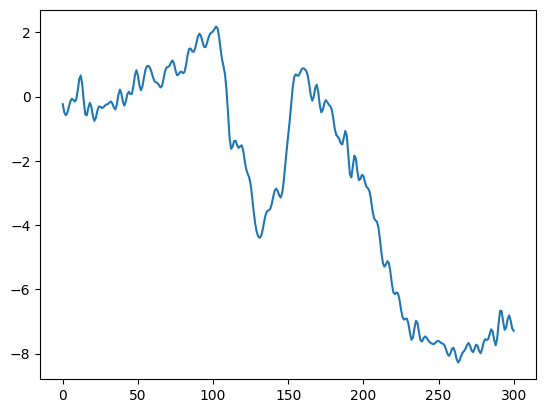

In [43]:
plt.plot(np.mean(epoch['car_brake'].average().get_data(), axis=0))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


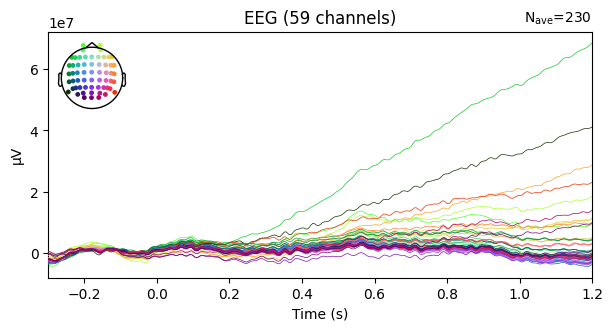

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


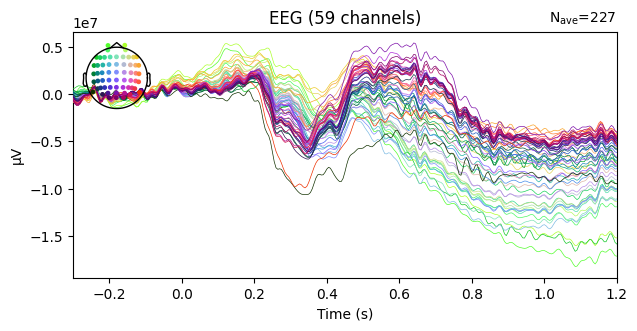

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
[ 8 15 17 18 19 24 25 26 27 28 29 33 34 35 36 37 42 43 44 45 46 47 48 49
 51 52 53 54 55 56]


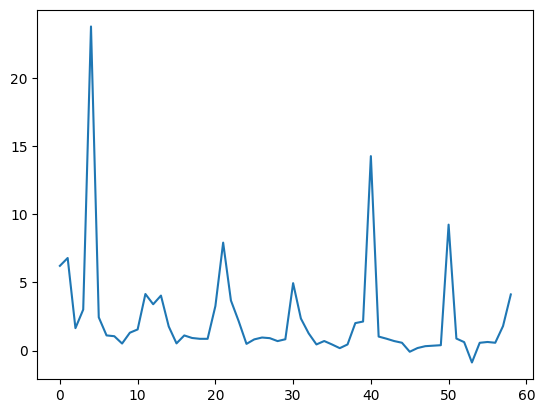

In [219]:
epoch['car_normal'].average().plot()
epoch['car_brake'].average().plot()
plt.plot(np.mean(epoch['car_normal'].average().get_data(), axis=1))
# plt.plot(np.mean(epoch['car_normal'].average().get_data(), axis=0))

npFiltered = np.where(np.mean(epoch['car_normal'].average().get_data(), axis=1) < 1)
print(npFiltered[0])
# print(npFiltered[0:5])

In [23]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
cd "/content/drive/MyDrive/Senior Project/EEG_Analysis"

/content/drive/MyDrive/Senior Project/EEG_Analysis


In [2]:
!python -m pip install mat73
!python -m pip install mne

  Obtaining dependency information for mat73 from https://files.pythonhosted.org/packages/d4/c3/123c118e31cd58f5db333ae2750da13da0d87707adac2255357de9bb5f87/mat73-0.62-py3-none-any.whl.metadata
  Obtaining dependency information for h5py from https://files.pythonhosted.org/packages/9a/10/b0249532b9f91b0390fb1f434ca9b57581dd57112323bf43144f33117814/h5py-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/32/95/908d0caa051beae4f7c77652dbbeb781e7b717f3040c5c5fcaed4d3ed08f/numpy-1.26.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for mne from https://files.pythonhosted.org/packages/6d/72/7d8ce176e042580a6261c7af0af6d4bbd3b495d304d8c73a229365f52ede/mne-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.6.3 from https://files.pythonhosted.org/packages/f4/ce/be0b376ba6069f3f8ba240aa532a374733447453c93582d4c474effdde21/scipy-1.11.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 435

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<a id='another_cell'>Load MATLAB Data</a>

In [21]:
#processing MATLAB Function

import mat73
import numpy as np
import mne


chan_names = ['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1' , 'Fz' , 'F2' , 'F4' , 'F6' , 'F8' , 'FT7' , 'FC5' , 'FC3' ,
              'FC1' , 'FCz' , 'FC2' , 'FC4' , 'FC6' , 'FT8' , 'T7' , 'C5' , 'C3' , 'C1' , 'Cz' , 'C2' , 'C4' , 'C6' , 'T8' , 'TP7' , 'CP5' ,
              'CP3' , 'CP1' , 'CPz' , 'CP2' , 'CP4' , 'CP6' , 'TP8' , 'P9' , 'P7' , 'P5' , 'P3' , 'P1' , 'Pz' , 'P2' , 'P4' , 'P6' , 'P8' ,
            'P10' , 'PO7' , 'PO3' , 'POz' , 'PO4' , 'PO8' , 'O1' , 'Oz' , 'O2' , 'EMGf' , 'lead_gas','lead_brake','dist_to_lead',
              'wheel_X','wheel_Y','gas','brake']



def load_MATLAB_data(dir=None, participant_data=None):
    if dir==None and participant_data==None: raise Exception("Must provide directory or dicitionary")
    # print(dir)
    #load data
    if participant_data == None:
      participant_data = mat73.loadmat(dir)

    eeg_names = chan_names[1:61]
    eeg_names.pop(4)


    #create MNE info object
    sfreq = 200
    n_channels = 59
    # Initialize an info structure
    info = mne.create_info(
            ch_names = eeg_names,
            ch_types = ['eeg']*n_channels,
            sfreq    = sfreq
            )

    info.set_montage('standard_1020')

    #create labels
    Y  = participant_data['mrk']['y']
    Y = np.rollaxis(Y, 1, 0)
    _, ind = np.where(Y>0)
    np.unique(ind)
    labels = ind + 1

    #create event dict
    event_id = dict(car_normal = 1, car_brake = 2,	car_hold = 3,	car_collision = 4,	react_emg = 5)
    eventLength = Y.shape[0]
    ev = np.array([int(participant_data['mrk']['time'][i]/5) for i in range(eventLength)])
    #delete duplicates
    # ev = np.delete(ev, 578, 0)
    # labels = np.delete(labels, 578, 0)

    events = np.column_stack((np.array(ev),
                          np.zeros(eventLength,  dtype = int),
                          np.array(labels)))

    #get time intervals around each y
    # stim_slices = [participant_data['cnt']['x'][int(idx/5)-340:int(idx/5)+240] for idx in participant_data['mrk']['time']]
    stim_slices = [participant_data['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in participant_data['mrk']['time']]


    # stim_slices.pop(578) #remove duplicates

    #reshape data
    npdata = np.array(stim_slices, dtype=object,)
    npdata = np.swapaxes(npdata, 1,2)
    npdata = np.delete(npdata, 0, 1)
    npdata = np.delete(npdata, 4, 1)
    npdata = np.delete(npdata, np.s_[59:], 1)

    # tmin = 0
    #     # Create the :class:`mne.EpochsArray` object
    # epochs = mne.EpochsArray(npdata, info, events, tmin, event_id)

    raw_data = np.swapaxes(np.array(participant_data['cnt']['x']), 0, 1)

    raw_data = np.delete(raw_data, 0, 0)
    raw_data = np.delete(raw_data, 4, 0)
    raw_data = np.delete(raw_data, np.s_[59:], 0)

    raw_eeg = mne.io.RawArray(raw_data,info, verbose=True)


    # epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-1.7, tmax=1.2, preload=True, event_repeated='drop', verbose=True)
    epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-0.3, tmax=1.2, preload=True, event_repeated='drop', verbose=True)



    return raw_eeg, epochs


In [22]:
vpdx_raw, vpdx_epochs = load_MATLAB_data("VPdx.mat")
# vpdx_epochs = load_MATLAB_data("VPdx.mat")


Creating RawArray with float64 data, n_channels=59, n_times=1619949
    Range : 0 ... 1619948 =      0.000 ...  8099.740 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1669 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1669 events and 301 original time points ...
0 bad epochs dropped


In [27]:
participant_data = mat73.loadmat("VPsaj.mat")

#create labels
Y  = participant_data['mrk']['y']
Y = np.rollaxis(Y, 1, 0)
_, ind = np.where(Y>0)
np.unique(ind)
labels = ind + 1

#create event dict
# event_id = dict(car_normal = 1, car_brake = 2,	car_hold = 3,	car_collision = 4,	react_emg = 5)
event_id = dict(car_normal = 1, car_brake = 2)
eventLength = Y.shape[0]
ev = np.array([int(participant_data['mrk']['time'][i]/5) for i in range(eventLength)])
#delete duplicates
# ev = np.delete(ev, 578, 0)
# labels = np.delete(labels, 578, 0)

events = np.column_stack((np.array(ev),
                        np.zeros(eventLength,  dtype = int),
                        np.array(labels)))

In [28]:
labels = []
non_targets = []
data_pairs = list(zip(participant_data['mrk']['time'], participant_data['mrk']['time'][1:]))
data_pairs = [(int(a[0]/5), int(a[1]/5)) for a in data_pairs]
# npTarget = np.delete(npTarget, npFiltered, 1)
for pr in data_pairs:
    counter = pr[0] + 600
    while (counter < pr[1]-900):
        # non_targets.append(vpae_dict['cnt']['x'][counter:counter+301])
        non_targets.append(counter)
        labels.append(1)
        counter += 301

ev = []
for i in range(eventLength):
    if participant_data['mrk']['y'][1][i]: 
        ev.append(int(participant_data['mrk']['time'][i]/5))
        labels.append(2)
ev = np.array(ev)
labels = np.array(labels)


non_targets = np.array(non_targets)

evs = np.concatenate((non_targets, ev))

events = np.column_stack((np.array(evs),
                        np.zeros(evs.shape[0],  dtype = int),
                        np.array(labels)))

In [29]:
print(ev.shape)
print(non_targets.shape)
print(evs.shape)
print(labels.shape)

(228,)
(3864,)
(4092,)
(4092,)


In [30]:
print(events.shape)
# print(Y[:,1].shape)
# print(Y[:,1][Y[:,1] == 1].shape)

chan_names = ['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1' , 'Fz' , 'F2' , 'F4' , 'F6' , 'F8' , 'FT7' , 'FC5' , 'FC3' ,
              'FC1' , 'FCz' , 'FC2' , 'FC4' , 'FC6' , 'FT8' , 'T7' , 'C5' , 'C3' , 'C1' , 'Cz' , 'C2' , 'C4' , 'C6' , 'T8' , 'TP7' , 'CP5' ,
              'CP3' , 'CP1' , 'CPz' , 'CP2' , 'CP4' , 'CP6' , 'TP8' , 'P9' , 'P7' , 'P5' , 'P3' , 'P1' , 'Pz' , 'P2' , 'P4' , 'P6' , 'P8' ,
            'P10' , 'PO7' , 'PO3' , 'POz' , 'PO4' , 'PO8' , 'O1' , 'Oz' , 'O2' , 'EMGf' , 'lead_gas','lead_brake','dist_to_lead',
              'wheel_X','wheel_Y','gas','brake']

eeg_names = chan_names[1:61]
eeg_names.pop(4)
#create MNE info object
sfreq = 200
n_channels = 59
# Initialize an info structure
info = mne.create_info(
        ch_names = eeg_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = sfreq
        )

info.set_montage('standard_1020')
event_id = dict(car_normal = 1, car_brake = 2)

raw_data = np.swapaxes(np.array(participant_data['cnt']['x']), 0, 1)

raw_data = np.delete(raw_data, 0, 0)
raw_data = np.delete(raw_data, 4, 0)
raw_data = np.delete(raw_data, np.s_[59:], 0)

raw_eeg = mne.io.RawArray(raw_data,info, verbose=True)


# epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-1.7, tmax=1.2, preload=True, event_repeated='drop', verbose=True)
epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-0.3, tmax=1.2, preload=True, event_repeated='drop', verbose=True)

(4092, 3)
Creating RawArray with float64 data, n_channels=59, n_times=1619940
    Range : 0 ... 1619939 =      0.000 ...  8099.695 secs
Ready.
Not setting metadata
4092 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 4092 events and 301 original time points ...


C:\Users\G7\AppData\Local\Temp\ipykernel_5620\957108914.py:36: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw_eeg, events, event_id=event_id, tmin=-0.3, tmax=1.2, preload=True, event_repeated='drop', verbose=True)


0 bad epochs dropped


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\G7\AppData\Local\Temp\ipykernel_5620\1948336900.py:3: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs['car_normal'].average().pick_channels(haufe_chans).plot()


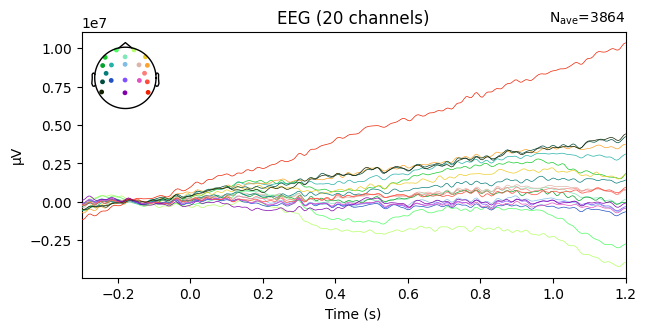

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\G7\AppData\Local\Temp\ipykernel_5620\1948336900.py:4: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  epochs['car_brake'].average().pick_channels(haufe_chans).plot()


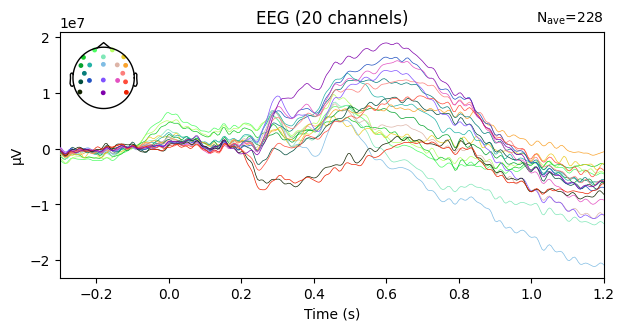

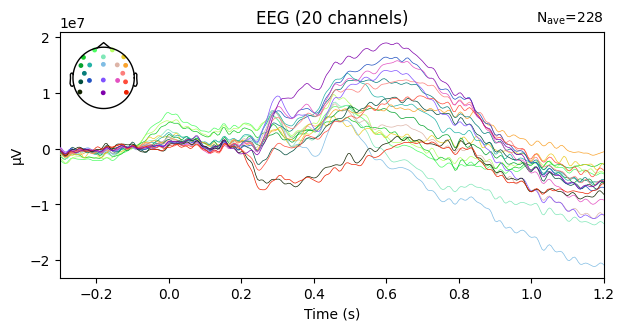

In [32]:
haufe_chans = ["Fz", "AF3", "AF4", "F7", "F8", "FT7", "FC3", "FC4", "FT8", "C5", "CP3", "FCz", "FC4", "FCz", "C6", "CP4", "TP7", "CPz", "TP8", "P9", "POz", "P10"]

epochs['car_normal'].average().pick_channels(haufe_chans).plot()
epochs['car_brake'].average().pick_channels(haufe_chans).plot()

(206, 59, 301)


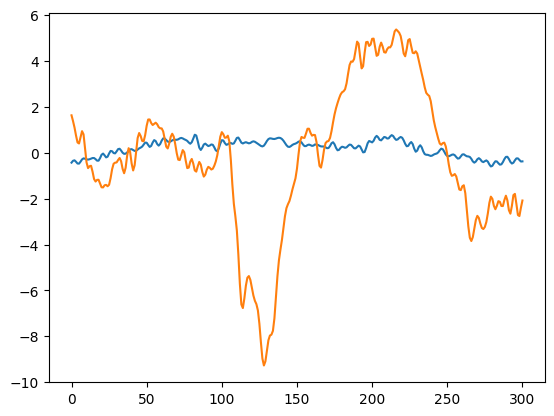

In [67]:

plt.plot(np.mean(epochs['car_normal'].get_data(), axis=(0,1)))
plt.plot(np.mean(epochs['car_brake'].get_data(), axis=(0,1)))
print(epochs['car_brake'].get_data().shape)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


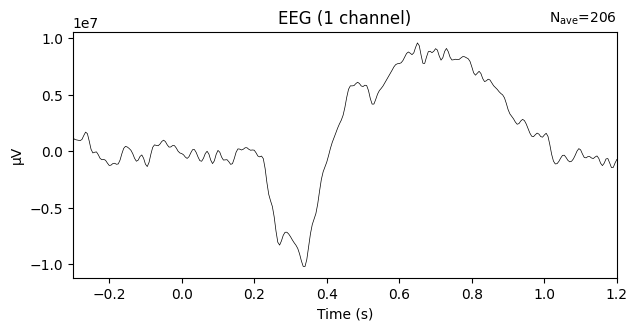

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


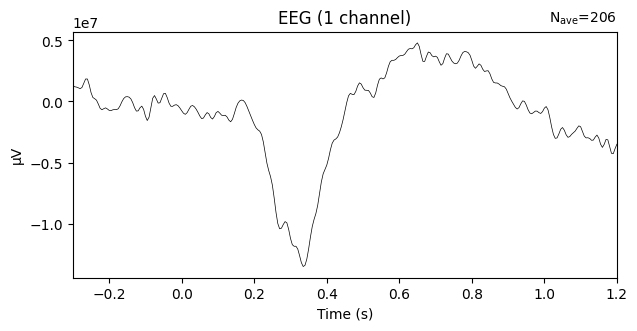

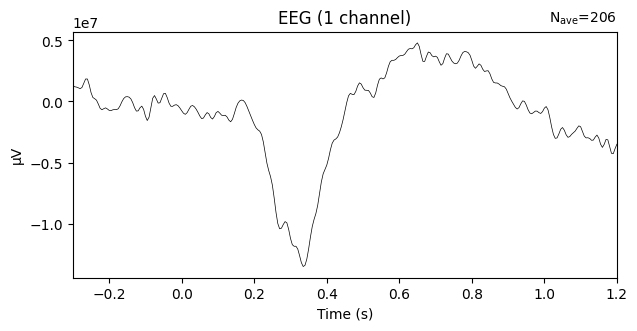

In [17]:
vpdx_epochs["car_brake"].average().pick_channels(["P7"]).plot()
vpdx_epochs["car_brake"].average().pick_channels(["P9"]).plot()
# vpdx_epochs["car_brake"].average().pick_channels(["FC6", "AF3"]).plot()

In [53]:
print(np.mean(vpdx_raw.get_data()))


36.39685428391672


In [223]:
stim_slices = [vpae_dict['cnt']['x'][int(idx/5)-60:int(idx/5)+240] for idx in vpae_dict['mrk']['time']]
indices = list(np.where(vpae_dict['mrk']['y'][1] == 1.0)[0])
times = [vpae_dict['mrk']['time'][x] for x in indices]
stim_brake_slices = np.array([vpae_dict['cnt']['x'][int(idx/5)-60-1:int(idx/5)+240] for idx in times])
stim_brake_slices = np.swapaxes(stim_brake_slices, 1, 2)
print(stim_brake_slices[0])

[[-3.17432402e+01 -3.38006725e+01 -3.86013477e+01 ... -2.74324298e+01
  -2.42972950e+01 -2.21418898e+01]
 [ 7.54307762e+01  8.06189105e+01  8.17718293e+01 ...  5.53828003e+01
   5.61727631e+01  5.92899138e+01]
 [ 9.24673657e+01  9.38345875e+01  9.61372767e+01 ...  8.61109839e+01
   8.57272024e+01  8.57751751e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.97650086e-05 -9.88250428e-05  7.90600343e-05 ...  0.00000000e+00
  -1.77885077e-04  9.88250428e-05]]


In [222]:
print(epoch["car_brake"].get_data()[0])

[[  3.77656139   4.92948013   1.70557773 ... -20.669586   -17.55243533
  -15.84440757]
 [ -6.64067901  -4.33798975  -3.85826282 ... -14.74806412 -14.70009143
  -14.65211874]
 [ -5.53064494  -4.38762784  -3.46873174 ... -14.45066075 -13.10593475
  -12.68010485]
 ...
 [-10.34059056 -11.18256079 -13.84879982 ...  -5.10166474  -8.18888889
  -10.15348607]
 [-10.45783978 -12.48430985 -16.56001933 ...  -5.4485879   -9.13721883
  -13.19015898]
 [-12.87126944 -15.04822436 -18.11887656 ...   6.14844196   5.04850684
    3.4444348 ]]


In [160]:
[i if vpae_dict['mrk']['y'][1][i]==1.0 for i in vpae_dict['mrk']['y'][1].shape]


SyntaxError: expected 'else' after 'if' expression (2251395160.py, line 1)

In [72]:
raw_data, _ = load_MATLAB_data("VPae.mat")


Creating RawArray with float64 data, n_channels=59, n_times=1619936
    Range : 0 ... 1619935 =      0.000 ...  8099.675 secs
Ready.
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped


In [117]:
print(raw_data.get_data().shape) 
print(epoch["car_brake"].get_data().shape) 
print(vpae_dict['cnt']['x'].shape) 

(59, 1619936)
(227, 59, 301)
(1619936, 69)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


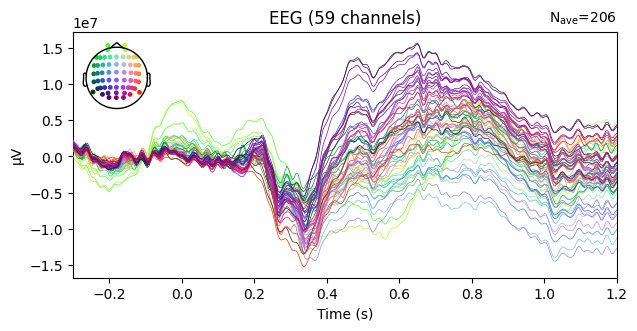

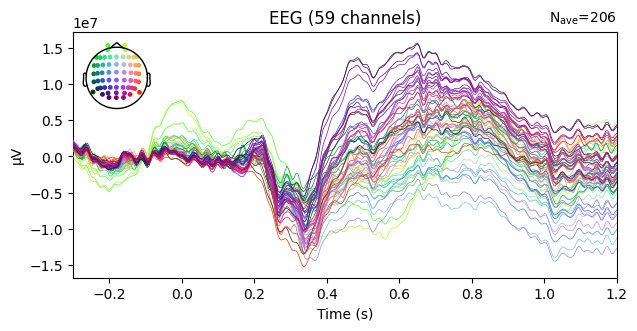

In [ ]:
ep2["car_brake"].average().plot()

In [123]:
indices = []
# print(epoch['car_brake'].average().get_data())
starts = [x[0] for x in epoch['car_brake'].average().get_data()]
for i in range(vpae_dict['mrk']['time'].shape[0]):
    if (vpae_dict['mrk']['y'][1][i] == 1.0):
        t = int(vpae_dict['mrk']['time'][i]/5)
        indices.append(t-40)
print(starts[0])
print(vpae_dict['cnt']['x'][0:5].shape)
# print(np.mean(vpae_dict['cnt']['x'][indices[0]]))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
-0.04489940829738308
(5, 69)


In [148]:
print(epoch['car_brake'].get_data()[1][0])
print(vpae_dict['cnt']['x'].shape)
ch1 = [vpae_dict['cnt']['x'][i][0] for i in range(vpae_dict['cnt']['x'].shape[0])]
print(ch1[0:5])
df = pd.DataFrame(ch1)
# df.head()
bool_mask = [3.77<=x<=3.78 for x in df[0]]
df = df[bool_mask]
df.head()

[-1.31693141e+01 -1.14826367e+01 -1.15893884e+01 -1.35109196e+01
 -1.51548964e+01 -1.42154811e+01 -1.07140242e+01 -6.76420996e+00
 -4.50107317e+00 -4.11676692e+00 -4.24486900e+00 -3.96731449e+00
 -3.68975998e+00 -3.86056276e+00 -4.01001519e+00 -2.98519853e+00
 -8.71514167e-01  5.37608739e-01 -3.37755491e-01 -2.64359297e+00
 -3.60435859e+00 -1.64012666e+00  1.73322818e+00  3.61205872e+00
  3.09965039e+00  2.43778963e+00  3.91096358e+00  6.79326043e+00
  8.11698195e+00  6.47300522e+00  3.65475941e+00  2.26698685e+00
  2.41643928e+00  2.16023512e+00  8.79214292e-01  9.00564640e-01
  4.72227677e+00  1.11060305e+01  1.55255524e+01  1.45434364e+01
  9.46205381e+00  4.65822572e+00  3.03559935e+00  3.56935802e+00
  3.29180351e+00  1.09271776e+00 -1.14906868e+00 -1.14906868e+00
  9.43265334e-01  2.58724206e+00  1.83997991e+00 -5.51258961e-01
 -1.89633083e+00 -6.58010697e-01  2.05348338e+00  3.69746011e+00
  3.12100073e+00  1.69052748e+00  1.34892193e+00  2.30968755e+00
  2.88614692e+00  2.05348

Empty DataFrame
Columns: [0]
Index: []

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


(3837, 59, 301)


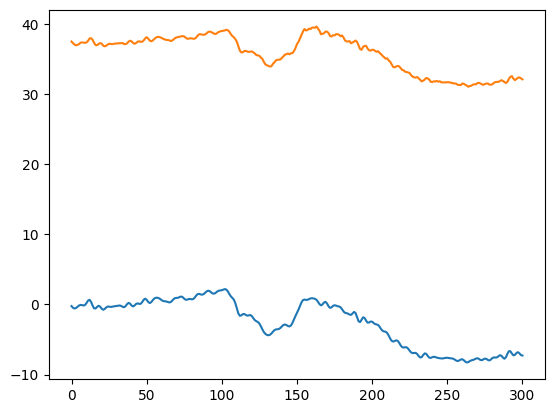

In [228]:
plt.plot(np.mean(epoch['car_brake'].average().get_data(), axis=0))
plt.plot(np.mean(stim_brake_slices, axis=(1,0)))
print(npNonTarget.shape)
# print(npNonTarget.shape)
# plt.plot(npNonTarget[0:,1:2,0:])
# plt.plot(np.mean(npNonTarget[0:,1:2,0:], axis=0))
# plt.plot([np.mean(npNonTarget[0:,i:i+1,0:]) for i in range(npNonTarget.shape[1])])
# plt.plot(np.mean(npTarget, axis=(0,1)))

In [ ]:
grand_average = mne.grand_average([ep1["car_brake"].average(), ep2["car_brake"].average()])
print(grand_average)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Identifying common channels ...
<Evoked | 'Grand average (n = 2)' (average, N=2), -0.3 – 1.2 s, baseline -0.3 – 0 s, 59 ch, ~223 kB>


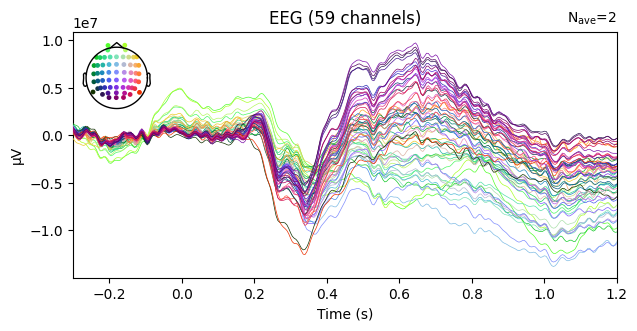

In [ ]:
fig1 = grand_average.plot()

In [ ]:
f = "data.mat"
f[-3:]

'mat'

In [34]:
import os
from tqdm import tqdm

mat_files = []


files_dir = ".\\"
for filename in tqdm(os.listdir(files_dir)):
    f = os.path.join(files_dir, filename)
    if os.path.isfile(f) and f[-3:] == "mat":
        mat_files.append(f)

100%|██████████| 20/20 [00:00<?, ?it/s]


In [36]:
print(mat_files[0:5])

['.\\VPae.mat', '.\\VPbad.mat', '.\\VPbax.mat', '.\\VPbba.mat', '.\\VPdx.mat']


In [ ]:
import mat73
from tqdm import tqdm

mat_dicts = [mat73.loadmat(file) for file in tqdm(mat_files[0:5])]

100%|██████████| 5/5 [01:23<00:00, 16.63s/it]


In [ ]:
print(type(mat_dict['cnt']))

<class 'list'>


In [ ]:
from collections import defaultdict

mat_dict = defaultdict(list)

for d in mat_dicts: # you can list as many input dicts as you want here
    for key, value in d.items():
        mat_dict[key].append(value)

# print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})

In [ ]:
mat_epochs = [load_MATLAB_data(file) for file in tqdm(mat_files)]


  0%|          | 0/18 [00:00<?, ?it/s]

./VPae.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped



  6%|▌         | 1/18 [00:14<04:07, 14.56s/it]

./VPgag.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1011 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1011 events and 301 original time points ...
0 bad epochs dropped



 11%|█         | 2/18 [00:28<03:50, 14.43s/it]

./VPja.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
946 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 946 events and 301 original time points ...
0 bad epochs dropped



 17%|█▋        | 3/18 [00:42<03:31, 14.09s/it]

./VPbad.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
913 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 913 events and 301 original time points ...
0 bad epochs dropped



 22%|██▏       | 4/18 [00:56<03:16, 14.05s/it]

./VPbba.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
702 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 702 events and 301 original time points ...
0 bad epochs dropped



 28%|██▊       | 5/18 [01:09<02:58, 13.71s/it]

./VPgab.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
959 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 959 events and 301 original time points ...
0 bad epochs dropped



 33%|███▎      | 6/18 [01:24<02:47, 13.95s/it]

./VPgam.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
934 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 934 events and 301 original time points ...
0 bad epochs dropped



 39%|███▉      | 7/18 [01:37<02:33, 13.93s/it]

./VPdx.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
1669 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1669 events and 301 original time points ...
0 bad epochs dropped



 44%|████▍     | 8/18 [01:53<02:24, 14.49s/it]

./VPgac.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
959 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 959 events and 301 original time points ...
0 bad epochs dropped



 50%|█████     | 9/18 [02:07<02:08, 14.29s/it]

./VPgah.mat
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
837 matching events found
Setting baseline interval to [-0.3, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 837 events and 301 original time points ...
0 bad epochs dropped



 56%|█████▌    | 10/18 [02:21<01:52, 14.07s/it]

./VPih.mat


AxisError: ignored

In [ ]:
evoked_mats = [ep["car_brake"].average() for ep in mat_epochs]
grand_average = mne.grand_average(evoked_mats)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Identifying common channels ...


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


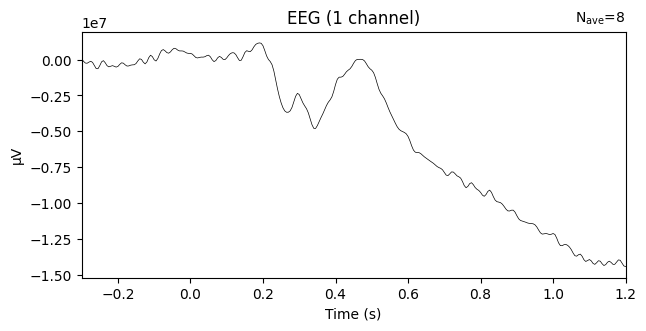

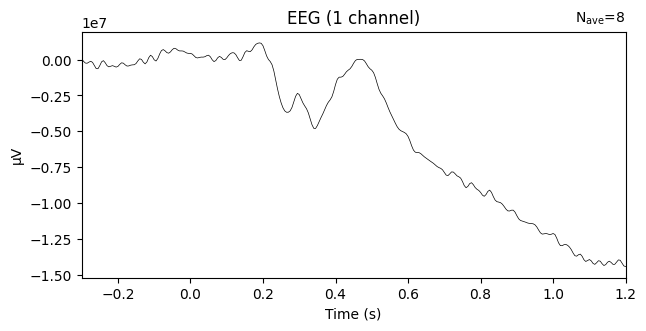

In [ ]:
haufe_chans = ["Fz", "AF3", "AF4", "F7", "F8", "FT7", "FC3", "FC4", "FT8", "C5", "CP3", "FCz", "FC4", "FCz", "C6", "CP4", "TP7", "CPz", "TP8", "P9", "POz", "P10"]
grand_average.pick_channels(haufe_chans).plot()

## Converting MATLAB Files to .csv

In [29]:
vpae_dict = mat73.loadmat("VPae.mat")

In [21]:
type(vpae_dict[listOfKeys[0]])

dict

In [24]:
# vpae_dict['cnt'].keys()

listOfKeys = list(vpae_dict.keys())
for i in range(len(listOfKeys)):
    listOfKeysI = list(vpae_dict[listOfKeys[i]].keys())
    for j in range(len(listOfKeysI)):
        print(j)
        if(type(vpae_dict[listOfKeys[i]][listOfKeysI[j]]) == np.ndarray):
            vpae_dict[listOfKeys[i]][listOfKeysI[j]] = vpae_dict[listOfKeys[i]][listOfKeysI[j]].tolist()



0
1
2
3
4
5
0
1
2
3
4
5
6
7
0
1
2
3


In [13]:
print(type(vpae_dict['cnt']['x']))
print(type(vpae_dict['mrk']['y']))
print(type(vpae_dict['mrk']['y']))
print(type(vpae_dict['mrk']['y']))
print(type(vpae_dict['mrk']['y']))
print(type(vpae_dict['mrk']['y']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
import json  

with open("VPae.json", "w") as outfile: 
    json.dump(vpae_dict, outfile, indent=4)

TypeError: Object of type ndarray is not JSON serializable

In [30]:
vpae_dict['cnt']['x'].shape

(1619936, 69)

In [ ]:
import json  

with open("VPae.json", "w") as outfile: 
    json.dump(vpae_dict, outfile, indent=4)